In [292]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection as ms
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.feature_selection as fs
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
import scipy
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn import ensemble

In [92]:
f_score, p_value = fs.f_regression(data[cont_list], response)
#print(["Feature {} is significant: pvalue is {}".format(cont_list[i],x) for i,x in enumerate(p_value) if x < 0.05 ])
sig_cont_list = [cont_list[i] for i,x in enumerate(p_value) if x < 0.05]
#print('\n'.join(sig_cont_list))
len(sig_cont_list)

26

In [127]:
data.loc[:,['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].sample(10)
columns_to_drop = ['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF'] #These variables sum up to being equal to TotalBsmtSF

In [128]:
data.loc[:,['1stFlrSF', '2ndFlrSF', 'GrLivArea']].sample(10)
columns_to_drop += ['1stFlrSF','2ndFlrSF'] # These variables sum up to being GrLivArea

In [14]:
data = pd.read_csv('./Train_Kaggle_Data_11_12PM.csv', index_col=0, na_filter=False)
response = data.SalePrice
data.drop('SalePrice', axis=1, inplace=True)

columns_to_drop = ['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF']
columns_to_drop += ['1stFlrSF','2ndFlrSF']
columns_to_drop += ['TotRmsAbvGrd', 'GarageArea', 'Id', 'Exterior2nd'] #TotRmsAbvGrd highly correlated with GrLivArea and BedroomAbvGr
                                                        #GarageArea highly correlated with GaraageCars
                                                        #Exterior2nd is highly correlated with Exterior1st
####maybe drop MSSubClass

data = data.drop(columns_to_drop, axis=1)
corr = data.corr(method='pearson')
#corr.SalePrice[(corr.SalePrice <= 0.1) & (corr.SalePrice >= -0.1)]

high_corr_list = []
#for i in corr.columns:
    
for i in corr.columns:
    if (i == 'SalePrice'):
        continue
    for j in corr.loc[i].index:
        if (i != j):
            cur_corr = corr.loc[i].loc[j]
            if (abs(cur_corr) > 0.6):
                print('{} and {} are highly correlated'.format(i,j))
            #if (abs(cur_corr) < 0.1):
            #    print('{} and {} are independent'.format(i,j))
        else:
            break


FullBath and GrLivArea are highly correlated
GarageCars and OverallQual are highly correlated


In [41]:
data.loc[:,'OverallCond'] = pd.Categorical(data.OverallCond, categories=range(1,11), ordered=True)
data.loc[:,'OverallQual'] = pd.Categorical(data.OverallQual, categories=range(1,11), ordered=True)

#condition = ['Ex', 'Gd', 'TA', 'Fa','Po', 'NA']
condition = ['Not_Avail','Po','Fa', 'TA', 'Gd', 'Ex']
data.loc[:, 'BsmtCond'] = pd.Categorical(data.BsmtCond, categories=condition, ordered=True) 
data.loc[:, 'BsmtQual'] = pd.Categorical(data.BsmtQual, categories=condition, ordered=True) 

#condition2 = ['Gd', 'Av', 'Mn', 'No', 'NA']
condition2 = ['Not_Avail', 'No', 'Mn', 'Av', 'Gd']
data.loc[:, 'BsmtExposure'] = pd.Categorical(data.BsmtExposure, categories=condition2, ordered=True)

#condition3 = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA']
condition3 = ['Not_Avail', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
data.loc[:, 'BsmtFinType1'] = pd.Categorical(data.BsmtFinType1, categories=condition3, ordered=True)
data.loc[:, 'BsmtFinType2'] = pd.Categorical(data.BsmtFinType2, categories=condition3, ordered=True)

#condition4 = ['Ex', 'Gd', 'TA', 'Fa','Po']
condition4 = ['Po', 'Fa', 'TA', 'Gd','Ex']
data.loc[:, 'HeatingQC'] = pd.Categorical(data.HeatingQC, categories=condition4, ordered=True)
data.loc[:, 'KitchenQual'] = pd.Categorical(data.KitchenQual, categories=condition4, ordered=True)

#condition5 = ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal']
condition5 = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
data.loc[:, 'Functional'] = pd.Categorical(data.Functional, categories=condition5, ordered=True)
data.loc[:, 'FireplaceQu'] = pd.Categorical(data.FireplaceQu, categories=condition, ordered=True)

condition6 = ['Not_Avail', 'Unf', 'RFn', 'Fin']
data.loc[:, 'GarageFinish'] = pd.Categorical(data.GarageFinish, categories=condition6, ordered=True)
data.loc[:, 'GarageQual'] = pd.Categorical(data.GarageQual, categories=condition, ordered=True)
data.loc[:, 'GarageCond'] = pd.Categorical(data.GarageCond, categories=condition, ordered=True)

condition7 = ['N', 'P', 'Y']
data.loc[:, 'PavedDrive'] = pd.Categorical(data.PavedDrive, categories=condition7, ordered=True)

condition8 = ['Not_Avail', 'Fa', 'TA', 'Gd', 'Ex']
data.loc[:, 'PoolQC'] = pd.Categorical(data.PoolQC, categories=condition8, ordered=True)
data.loc[:, 'MSSubClass'] = pd.Categorical(data.MSSubClass)
data.loc[:, 'MoSold'] = pd.Categorical(data.MoSold)

In [42]:
temp = data.dtypes.to_dict()
#temp = temp.to_dict()
#print(temp)
cat_list = []
ord_list = []
cont_list = []
for key,value in temp.items():
    if(str(value) not in ['float64', 'int64', 'int32']):
        if(str(value) == 'category'):
            ord_list.append(key)
        elif (str(value) == 'object'):
            cat_list.append(key)
        else:
            print('Key {} is type {}'.format(key, value))
    else:
        cont_list.append(key)

print('Number of Ordinal Features: {}'.format(len(ord_list)))
print('Number of Nominal Features: {}'.format(len(cat_list)))
print('Number of Continuous Features: {}'.format(len(cont_list)))


Number of Ordinal Features: 18
Number of Nominal Features: 28
Number of Continuous Features: 25


In [43]:
'MSSubClass' in ord_list # drop 90 for Duplex
print('BldgType' in cat_list) # drop Duplex 

# Drop Not_Avail
'BsmtExposure' in ord_list 
'BsmtFinType1' in ord_list
'BsmtFinType2' in ord_list
'BsmtQual' in ord_list
'BsmtCond' in ord_list
'GarageFinish' in ord_list
'GarageQual' in ord_list
'GarageCond' in ord_list

True


True

In [44]:
cat_list_temp = [x for x in cat_list if x not in ['BldgType', 'Exterior1st', 'Exterior2nd', 'GarageType', 
                                                  'SaleType', 'SaleCondition']]
ord_list_temp = [x for x in ord_list if x not in ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                  'BsmtQual', 'BsmtCond', 'GarageFinish', 'GarageQual', 'GarageCond']]

ord_list_temp
cat_list_temp

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Fence',
 'MiscFeature']

In [45]:
data_with_dummies = data[cont_list]
for i in cat_list_temp:
    x = data[i].value_counts()
    #print('Will drop column {}_{}'.format(i,x.index[0]))
    temp_df = pd.get_dummies(data[i], prefix=i).drop('{}_{}'.format(i,x.index[0]), axis=1)
    #print('For column {}: First index is {} and values is {}'.format(i,x.index[0],x[0]))
    data_with_dummies = pd.concat([data_with_dummies, temp_df], axis=1)

for i in ord_list_temp:
    x = (data[i].value_counts())
    #print('Will drop column {}_{}'.format(i,x.index[0]))
    temp_df = pd.get_dummies(data[i], prefix=i).drop('{}_{}'.format(i,x.index[0]), axis=1)
    #print('For column {}: First index is {} and values is {}'.format(i,x.index[0],x[0]))
    data_with_dummies = pd.concat([data_with_dummies, temp_df], axis=1)
#data_with_dummies.head()

In [46]:
#cat_list_temp.remove('BldgType')
#ord_list_temp = [x for x in ord_list if x not in ['MSSubClass', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#                                 'BsmtQual', 'BsmtCond', 'GarageFinish', 'GarageQual', 'GarageCond']]
for i in ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','BsmtQual', 'BsmtCond', 
          'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType']:
    temp_df = pd.get_dummies(data[i], prefix=i).drop('{}_{}'.format(i,'Not_Avail'), axis=1)
    data_with_dummies = pd.concat([data_with_dummies, temp_df], axis=1)



In [47]:
temp_df = pd.get_dummies(data.BldgType, prefix='BldgType').drop('BldgType_Duplex', axis=1)
data_with_dummies = pd.concat([data_with_dummies, temp_df], axis=1)


In [48]:
temp_df = pd.get_dummies(data.Exterior1st, prefix='Exterior1st').drop('Exterior1st_CBlock', axis=1)
data_with_dummies = pd.concat([data_with_dummies, temp_df], axis=1)
#temp_df = pd.get_dummies(data.Exterior2nd, prefix='Exterior2nd').drop('Exterior2nd_CBlock', axis=1)
#data_with_dummies = pd.concat([data_with_dummies, temp_df], axis=1)
temp_df = pd.get_dummies(data.SaleType, prefix='SaleType').drop('SaleType_New', axis=1)
data_with_dummies = pd.concat([data_with_dummies, temp_df], axis=1)
temp_df = pd.get_dummies(data.SaleCondition, prefix='SaleCondition').drop('SaleCondition_Partial', axis=1)
data_with_dummies = pd.concat([data_with_dummies, temp_df], axis=1)

In [49]:
data_with_dummies.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,65.0,8450,2003,2003,196.0,856,0,1710,1,0,...,0,0,0,0,1,0,0,0,0,1
1,80.0,9600,1976,1976,0.0,1262,0,1262,0,1,...,0,0,0,0,1,0,0,0,0,1
2,68.0,11250,2001,2002,162.0,920,0,1786,1,0,...,0,0,0,0,1,0,0,0,0,1
3,60.0,9550,1915,1970,0.0,756,0,1717,1,0,...,0,0,0,0,1,1,0,0,0,0
4,84.0,14260,2000,2000,350.0,1145,0,2198,1,0,...,0,0,0,0,1,0,0,0,0,1


In [50]:
corr = data_with_dummies.corr(method='pearson')
#corr.SalePrice[(corr.SalePrice <= 0.1) & (corr.SalePrice >= -0.1)]

high_corr_list = []
#for i in corr.columns:

for i in corr.columns:
    if (i == 'SalePrice'):
        continue
    for j in corr.loc[i].index:
        if (i != j):
            cur_corr = corr.loc[i].loc[j]
            #if (cur_corr > 0.7 or cur_corr < -0.7):
            #if(cur_corr ==1):
            #    print('{} and {} are highly correlated: {}'.format(i,j, cur_corr))
            if (abs(cur_corr) < 0.1):
                print('{} and {} are independent: {}'.format(i,j, cur_corr))
                
        else:
            break

YearBuilt and LotFrontage are independent: 0.03685342864956514
YearBuilt and LotArea are independent: 0.014227651757024678
YearRemodAdd and LotFrontage are independent: 0.07868551455011005
YearRemodAdd and LotArea are independent: 0.013788427078154822
LowQualFinSF and LotFrontage are independent: 0.04998143020178769
LowQualFinSF and LotArea are independent: 0.004778969866349652
LowQualFinSF and YearRemodAdd are independent: -0.0624191000783343
LowQualFinSF and MasVnrArea are independent: -0.06862797990734122
LowQualFinSF and TotalBsmtSF are independent: -0.03324538734745721
BsmtFullBath and LotFrontage are independent: 0.010514333445131814
BsmtFullBath and MasVnrArea are independent: 0.08301004780135988
BsmtFullBath and LowQualFinSF are independent: -0.04714342189826147
BsmtFullBath and GrLivArea are independent: 0.0348360495449059
BsmtHalfBath and LotFrontage are independent: -0.027855657759131472
BsmtHalfBath and LotArea are independent: 0.048045570888297716
BsmtHalfBath and YearBuil

LotConfig_FR2 and BedroomAbvGr are independent: 0.015595016760622832
LotConfig_FR2 and KitchenAbvGr are independent: -0.003330390846813564
LotConfig_FR2 and Fireplaces are independent: -0.034993931451651424
LotConfig_FR2 and GarageYrBlt are independent: -0.00335189626339689
LotConfig_FR2 and GarageCars are independent: 0.030881041295088812
LotConfig_FR2 and WoodDeckSF are independent: 0.006054896970027786
LotConfig_FR2 and OpenPorchSF are independent: 0.03807980950445732
LotConfig_FR2 and EnclosedPorch are independent: -0.0590556117386221
LotConfig_FR2 and 3SsnPorch are independent: 0.0412771645106969
LotConfig_FR2 and ScreenPorch are independent: -0.043711172941205384
LotConfig_FR2 and PoolArea are independent: -0.012528019281947697
LotConfig_FR2 and MiscVal are independent: -0.00855954598704881
LotConfig_FR2 and YrSold are independent: 0.022387472226144803
LotConfig_FR2 and MSZoning_C (all) are independent: -0.015145856819373672
LotConfig_FR2 and MSZoning_FV are independent: 0.017074

Neighborhood_Gilbert and GarageYrBlt are independent: 0.06852592741888854
Neighborhood_Gilbert and GarageCars are independent: 0.09481994475003477
Neighborhood_Gilbert and WoodDeckSF are independent: 0.016374927900067317
Neighborhood_Gilbert and OpenPorchSF are independent: -0.014543228384964097
Neighborhood_Gilbert and EnclosedPorch are independent: -0.08594171584775212
Neighborhood_Gilbert and 3SsnPorch are independent: 0.06173840738217221
Neighborhood_Gilbert and ScreenPorch are independent: -0.04882097399145046
Neighborhood_Gilbert and PoolArea are independent: -0.01642938366183779
Neighborhood_Gilbert and MiscVal are independent: -0.010717242516930126
Neighborhood_Gilbert and YrSold are independent: -0.04662148966496311
Neighborhood_Gilbert and MSZoning_C (all) are independent: -0.019862444890335663
Neighborhood_Gilbert and MSZoning_FV are independent: -0.051628116439763574
Neighborhood_Gilbert and MSZoning_RH are independent: -0.02517636933821507
Neighborhood_Gilbert and Street_G

Neighborhood_Sawyer and HalfBath are independent: -0.039335378133066284
Neighborhood_Sawyer and BedroomAbvGr are independent: 0.018698896100217438
Neighborhood_Sawyer and KitchenAbvGr are independent: 0.03619799875630903
Neighborhood_Sawyer and Fireplaces are independent: -0.0599019046137976
Neighborhood_Sawyer and GarageYrBlt are independent: 0.01107239195421637
Neighborhood_Sawyer and GarageCars are independent: -0.09516029089356838
Neighborhood_Sawyer and WoodDeckSF are independent: 0.005779320830242626
Neighborhood_Sawyer and OpenPorchSF are independent: -0.07867665532879287
Neighborhood_Sawyer and EnclosedPorch are independent: 0.011621351117784373
Neighborhood_Sawyer and 3SsnPorch are independent: -0.02688194197881067
Neighborhood_Sawyer and ScreenPorch are independent: -0.013417575979801486
Neighborhood_Sawyer and PoolArea are independent: -0.015872261493788467
Neighborhood_Sawyer and MiscVal are independent: 0.0426980070052763
Neighborhood_Sawyer and YrSold are independent: 0.0

Condition1_PosA and GarageCars are independent: 0.02313837328785369
Condition1_PosA and WoodDeckSF are independent: -0.006068992380951162
Condition1_PosA and OpenPorchSF are independent: 0.020833299721082527
Condition1_PosA and EnclosedPorch are independent: -0.002070287651211071
Condition1_PosA and 3SsnPorch are independent: -0.00863551176069061
Condition1_PosA and ScreenPorch are independent: 0.06284185357220165
Condition1_PosA and PoolArea are independent: -0.005098779727536097
Condition1_PosA and MiscVal are independent: -0.006508799844839659
Condition1_PosA and YrSold are independent: 0.024278267279618855
Condition1_PosA and MSZoning_C (all) are independent: -0.006164213669279911
Condition1_PosA and MSZoning_FV are independent: -0.0160225361396469
Condition1_PosA and MSZoning_RH are independent: -0.007813364410791846
Condition1_PosA and MSZoning_RM are independent: -0.031097761909707197
Condition1_PosA and Street_Grvl are independent: -0.004768207068885187
Condition1_PosA and Alle

Condition2_Feedr and GarageCars are independent: -0.022969431679082802
Condition2_Feedr and WoodDeckSF are independent: 0.005087006697456286
Condition2_Feedr and OpenPorchSF are independent: -0.02165439362869336
Condition2_Feedr and EnclosedPorch are independent: 0.030188169485443086
Condition2_Feedr and 3SsnPorch are independent: -0.007473427342069514
Condition2_Feedr and ScreenPorch are independent: -0.017357700646130767
Condition2_Feedr and PoolArea are independent: -0.004412634813424084
Condition2_Feedr and MiscVal are independent: 0.007319568811728907
Condition2_Feedr and YrSold are independent: 0.025043235205040183
Condition2_Feedr and MSZoning_FV are independent: -0.01386637676998105
Condition2_Feedr and MSZoning_RH are independent: -0.00676191670387925
Condition2_Feedr and MSZoning_RM are independent: 0.06320833320357591
Condition2_Feedr and Street_Grvl are independent: -0.00412654745529577
Condition2_Feedr and Alley_Grvl are independent: -0.012096754525324596
Condition2_Feedr 

HouseStyle_1.5Fin and Condition1_RRAe are independent: -0.004132885497340771
HouseStyle_1.5Fin and Condition1_RRAn are independent: -0.012518032756690693
HouseStyle_1.5Fin and Condition1_RRNe are independent: -0.012718181187276202
HouseStyle_1.5Fin and Condition1_RRNn are independent: -0.020129930592550103
HouseStyle_1.5Fin and Condition2_Artery are independent: -0.012718181187275586
HouseStyle_1.5Fin and Condition2_Feedr are independent: 0.047650861804150915
HouseStyle_1.5Fin and Condition2_PosA are independent: -0.008990029689756956
HouseStyle_1.5Fin and Condition2_PosN are independent: -0.012718181187276016
HouseStyle_1.5Fin and Condition2_RRAe are independent: 0.07624012191442874
HouseStyle_1.5Fin and Condition2_RRAn are independent: -0.008990029689756714
HouseStyle_1.5Fin and Condition2_RRNn are independent: -0.012718181187276077
HouseStyle_1.5Unf and LotFrontage are independent: -0.019618304967416407
HouseStyle_1.5Unf and LotArea are independent: -0.03351050622896094
HouseStyle_1

RoofStyle_Flat and BedroomAbvGr are independent: -0.038120389344921055
RoofStyle_Flat and KitchenAbvGr are independent: -0.05314443542586626
RoofStyle_Flat and Fireplaces are independent: 0.06823140568525102
RoofStyle_Flat and GarageYrBlt are independent: -0.011809657217586592
RoofStyle_Flat and GarageCars are independent: 0.0002673906829325129
RoofStyle_Flat and WoodDeckSF are independent: 0.037348348948755
RoofStyle_Flat and OpenPorchSF are independent: 0.04584007409467944
RoofStyle_Flat and EnclosedPorch are independent: -0.034058437855081405
RoofStyle_Flat and 3SsnPorch are independent: 0.021314456625407888
RoofStyle_Flat and ScreenPorch are independent: 0.06399312871978409
RoofStyle_Flat and MiscVal are independent: -0.008311447038190124
RoofStyle_Flat and YrSold are independent: -0.019796762520502238
RoofStyle_Flat and MSZoning_C (all) are independent: -0.007871425864313069
RoofStyle_Flat and MSZoning_FV are independent: -0.02046006386995362
RoofStyle_Flat and MSZoning_RH are ind

RoofMatl_ClyTile and Condition2_PosN are independent: -0.0009696356842476767
RoofMatl_ClyTile and Condition2_RRAe are independent: -0.000685400959561366
RoofMatl_ClyTile and Condition2_RRAn are independent: -0.0006854009595613644
RoofMatl_ClyTile and Condition2_RRNn are independent: -0.0009696356842476868
RoofMatl_ClyTile and HouseStyle_1.5Fin are independent: -0.008990029689756544
RoofMatl_ClyTile and HouseStyle_1.5Unf are independent: -0.0025760377642485236
RoofMatl_ClyTile and HouseStyle_2.5Fin are independent: -0.0019432739968373693
RoofMatl_ClyTile and HouseStyle_2.5Unf are independent: -0.0022810484185192647
RoofMatl_ClyTile and HouseStyle_2Story are independent: 0.039538971642545544
RoofMatl_ClyTile and HouseStyle_SFoyer are independent: -0.00422153861369045
RoofMatl_ClyTile and HouseStyle_SLvl are independent: -0.0056512162786067285
RoofMatl_ClyTile and RoofStyle_Flat are independent: -0.0024814742026844083
RoofMatl_ClyTile and RoofStyle_Gambrel are independent: -0.002281048418

RoofMatl_WdShngl and Condition2_PosN are independent: -0.0023791929143278244
RoofMatl_WdShngl and Condition2_RRAe are independent: -0.0016817668047428803
RoofMatl_WdShngl and Condition2_RRAn are independent: -0.0016817668047428632
RoofMatl_WdShngl and Condition2_RRNn are independent: -0.00237919291432778
RoofMatl_WdShngl and HouseStyle_1.5Fin are independent: -0.022058815785088122
RoofMatl_WdShngl and HouseStyle_1.5Unf are independent: -0.006320818112728834
RoofMatl_WdShngl and HouseStyle_2.5Unf are independent: -0.005597003413494294
RoofMatl_WdShngl and HouseStyle_2Story are independent: -0.01927589337149634
RoofMatl_WdShngl and HouseStyle_SFoyer are independent: -0.010358379874443852
RoofMatl_WdShngl and HouseStyle_SLvl are independent: 0.03804364908686816
RoofMatl_WdShngl and RoofStyle_Flat are independent: -0.006088787712773744
RoofMatl_WdShngl and RoofStyle_Gambrel are independent: -0.00559700341349427
RoofMatl_WdShngl and RoofStyle_Hip are independent: -0.004730042814702657
RoofM

ExterQual_Fa and Condition1_PosA are independent: -0.007303676967915376
ExterQual_Fa and Condition1_PosN are independent: -0.011298601240319039
ExterQual_Fa and Condition1_RRAe are independent: -0.008573181560681951
ExterQual_Fa and Condition1_RRAn are independent: -0.013249270586763834
ExterQual_Fa and Condition1_RRNe are independent: -0.003644316666530071
ExterQual_Fa and Condition2_Artery are independent: -0.0036443166665298186
ExterQual_Fa and Condition2_PosA are independent: -0.002576037764248734
ExterQual_Fa and Condition2_PosN are independent: -0.0036443166665299787
ExterQual_Fa and Condition2_RRAe are independent: -0.002576037764248574
ExterQual_Fa and Condition2_RRAn are independent: -0.0025760377642486316
ExterQual_Fa and Condition2_RRNn are independent: -0.0036443166665300285
ExterQual_Fa and HouseStyle_1.5Fin are independent: 0.011973282938766733
ExterQual_Fa and HouseStyle_1.5Unf are independent: -0.00968188105117574
ExterQual_Fa and HouseStyle_2.5Fin are independent: 0.08

ExterCond_Po and HouseStyle_1.5Unf are independent: -0.0025760377642488077
ExterCond_Po and HouseStyle_2.5Fin are independent: -0.0019432739968374766
ExterCond_Po and HouseStyle_2.5Unf are independent: -0.0022810484185193953
ExterCond_Po and HouseStyle_2Story are independent: -0.017334820079736135
ExterCond_Po and HouseStyle_SFoyer are independent: -0.004221538613690505
ExterCond_Po and HouseStyle_SLvl are independent: -0.005651216278606567
ExterCond_Po and RoofStyle_Flat are independent: -0.0024814742026842305
ExterCond_Po and RoofStyle_Gambrel are independent: -0.002281048418519301
ExterCond_Po and RoofStyle_Hip are independent: -0.01292174963610049
ExterCond_Po and RoofStyle_Mansard are independent: -0.001817140746726602
ExterCond_Po and RoofStyle_Shed are independent: -0.0009696356842477249
ExterCond_Po and RoofMatl_ClyTile are independent: -0.0006854009595613832
ExterCond_Po and RoofMatl_Membran are independent: -0.0006854009595614097
ExterCond_Po and RoofMatl_Metal are independen

Foundation_Wood and HouseStyle_1.5Unf are independent: -0.004464889578961179
Foundation_Wood and HouseStyle_2.5Fin are independent: -0.0033681586263843554
Foundation_Wood and HouseStyle_2.5Unf are independent: -0.003953602487626683
Foundation_Wood and HouseStyle_2Story are independent: 0.002813238700277186
Foundation_Wood and HouseStyle_SFoyer are independent: -0.007316936119897104
Foundation_Wood and HouseStyle_SLvl are independent: -0.009794909461728682
Foundation_Wood and RoofStyle_Flat are independent: -0.0043009883091752205
Foundation_Wood and RoofStyle_Gambrel are independent: -0.003953602487626665
Foundation_Wood and RoofStyle_Hip are independent: -0.02239648272741779
Foundation_Wood and RoofStyle_Mansard are independent: -0.003149539535547673
Foundation_Wood and RoofStyle_Shed are independent: -0.0016806105570619759
Foundation_Wood and RoofMatl_ClyTile are independent: -0.0011879637962715318
Foundation_Wood and RoofMatl_Membran are independent: -0.0011879637962715598
Foundation

Heating_Wall and HalfBath are independent: -0.039919770089506756
Heating_Wall and BedroomAbvGr are independent: -0.023551957221221165
Heating_Wall and Fireplaces are independent: -0.049857815195159305
Heating_Wall and GarageYrBlt are independent: 0.010459954112263203
Heating_Wall and GarageCars are independent: -0.001201383153417715
Heating_Wall and WoodDeckSF are independent: -0.02980327879470956
Heating_Wall and OpenPorchSF are independent: -0.036924955452467066
Heating_Wall and EnclosedPorch are independent: 0.020842682566278883
Heating_Wall and 3SsnPorch are independent: -0.0060978354792117495
Heating_Wall and ScreenPorch are independent: -0.014162766023253667
Heating_Wall and PoolArea are independent: -0.0036004258676116323
Heating_Wall and MiscVal are independent: -0.004596090158966685
Heating_Wall and YrSold are independent: 0.01714372971679055
Heating_Wall and MSZoning_C (all) are independent: -0.004352765864448427
Heating_Wall and MSZoning_FV are independent: -0.01131407055503

Electrical_FuseP and RoofMatl_ClyTile are independent: -0.0011879637962715493
Electrical_FuseP and RoofMatl_Membran are independent: -0.0011879637962714795
Electrical_FuseP and RoofMatl_Metal are independent: -0.0011879637962714702
Electrical_FuseP and RoofMatl_Roll are independent: -0.0011879637962715478
Electrical_FuseP and RoofMatl_Tar&Grv are independent: -0.0039536024876267095
Electrical_FuseP and RoofMatl_WdShake are independent: -0.0026600166618647022
Electrical_FuseP and RoofMatl_WdShngl are independent: -0.0029149041155187285
Electrical_FuseP and MasVnrType_BrkCmn are independent: -0.004623198679961343
Electrical_FuseP and MasVnrType_BrkFace are independent: -0.030045389318959746
Electrical_FuseP and MasVnrType_Stone are independent: -0.014066424641259491
Electrical_FuseP and ExterQual_Ex are independent: -0.008720295379562894
Electrical_FuseP and ExterQual_Fa are independent: -0.004464889578961104
Electrical_FuseP and ExterQual_Gd are independent: -0.03215197311348095
Electri

Fence_MnPrv and ExterQual_Fa are independent: 0.011219331985314667
Fence_MnPrv and ExterCond_Ex are independent: -0.01575101227020251
Fence_MnPrv and ExterCond_Fa are independent: 0.06430560190122808
Fence_MnPrv and ExterCond_Gd are independent: 0.0685392992358336
Fence_MnPrv and ExterCond_Po are independent: -0.009087616102394523
Fence_MnPrv and Foundation_BrkTil are independent: 0.03906003074730309
Fence_MnPrv and Foundation_Slab are independent: -0.027487227037138094
Fence_MnPrv and Foundation_Stone are independent: -0.022298263347976296
Fence_MnPrv and Foundation_Wood are independent: 0.03307378160346253
Fence_MnPrv and Heating_Floor are independent: -0.00908761610239479
Fence_MnPrv and Heating_GasW are independent: -0.018746050495820336
Fence_MnPrv and Heating_Grav are independent: 0.03992142954950317
Fence_MnPrv and Heating_OthW are independent: -0.012856236535275916
Fence_MnPrv and Heating_Wall are independent: -0.01819394705327382
Fence_MnPrv and CentralAir_N are independent: -

MSSubClass_30 and LotFrontage are independent: -0.01620856352401189
MSSubClass_30 and LotArea are independent: -0.058668495563268544
MSSubClass_30 and LowQualFinSF are independent: -0.0028735869109289152
MSSubClass_30 and BsmtFullBath are independent: -0.08928501278806975
MSSubClass_30 and BsmtHalfBath are independent: -0.05368933177337251
MSSubClass_30 and KitchenAbvGr are independent: -0.04709513272512784
MSSubClass_30 and OpenPorchSF are independent: -0.06576989097432992
MSSubClass_30 and 3SsnPorch are independent: -0.02591119096281312
MSSubClass_30 and ScreenPorch are independent: -0.04361861827160748
MSSubClass_30 and PoolArea are independent: -0.015299088097929306
MSSubClass_30 and MiscVal are independent: -0.0033891861784601917
MSSubClass_30 and YrSold are independent: -0.00799151988871022
MSSubClass_30 and MSZoning_C (all) are independent: 0.059776812263637194
MSSubClass_30 and MSZoning_FV are independent: -0.04807624668092353
MSSubClass_30 and MSZoning_RH are independent: 0.00

MSSubClass_75 and Condition1_RRAn are independent: -0.014173871561726328
MSSubClass_75 and Condition1_RRNe are independent: -0.0038986354775830275
MSSubClass_75 and Condition1_RRNn are independent: -0.006170635597479524
MSSubClass_75 and Condition2_Artery are independent: -0.0038986354775830505
MSSubClass_75 and Condition2_Feedr are independent: -0.006761916703879282
MSSubClass_75 and Condition2_PosN are independent: -0.0038986354775830054
MSSubClass_75 and Condition2_RRAe are independent: -0.0027558066815461073
MSSubClass_75 and Condition2_RRAn are independent: -0.0027558066815461363
MSSubClass_75 and Condition2_RRNn are independent: -0.003898635477583047
MSSubClass_75 and HouseStyle_1.5Fin are independent: -0.03614640969015354
MSSubClass_75 and HouseStyle_1.5Unf are independent: -0.01035753157855913
MSSubClass_75 and HouseStyle_2Story are independent: -0.05540638514917162
MSSubClass_75 and HouseStyle_SFoyer are independent: -0.016973632959980445
MSSubClass_75 and HouseStyle_SLvl are 

MSSubClass_120 and ExterCond_Gd are independent: -0.06461876493603545
MSSubClass_120 and ExterCond_Po are independent: -0.006590171425590934
MSSubClass_120 and Foundation_BrkTil are independent: -0.08390794849903169
MSSubClass_120 and Foundation_Slab are independent: -0.03254263825504957
MSSubClass_120 and Foundation_Stone are independent: -0.016170288918499334
MSSubClass_120 and Foundation_Wood are independent: -0.011422343309579641
MSSubClass_120 and Heating_Floor are independent: -0.006590171425590757
MSSubClass_120 and Heating_GasW are independent: -0.02812405768559456
MSSubClass_120 and Heating_Grav are independent: -0.01747191750798915
MSSubClass_120 and Heating_OthW are independent: -0.009323105388781141
MSSubClass_120 and Heating_Wall are independent: -0.013193914513796555
MSSubClass_120 and CentralAir_N are independent: -0.06640791342151953
MSSubClass_120 and Electrical_FuseA are independent: -0.06603328984767118
MSSubClass_120 and Electrical_FuseF are independent: -0.03455279

OverallQual_1 and Neighborhood_Sawyer are independent: -0.008557964499010555
OverallQual_1 and Neighborhood_SawyerW are independent: -0.007600517687601695
OverallQual_1 and Neighborhood_Somerst are independent: -0.009265995716504353
OverallQual_1 and Neighborhood_StoneBr are independent: -0.004888552568040852
OverallQual_1 and Neighborhood_Timber are independent: -0.006054499336711954
OverallQual_1 and Neighborhood_Veenker are independent: -0.0032269956924316197
OverallQual_1 and Condition1_Artery are independent: -0.006828723154032805
OverallQual_1 and Condition1_Feedr are independent: -0.008976284567381011
OverallQual_1 and Condition1_PosA are independent: -0.0027491467371304514
OverallQual_1 and Condition1_PosN are independent: -0.004252859603513692
OverallQual_1 and Condition1_RRAe are independent: -0.0032269956924316614
OverallQual_1 and Condition1_RRAn are independent: -0.004987102956903289
OverallQual_1 and Condition1_RRNe are independent: -0.0013717421124828817
OverallQual_1 an

OverallQual_9 and Electrical_Mix are independent: -0.0045605965745543426
OverallQual_9 and Fence_GdPrv are independent: -0.03574836971662299
OverallQual_9 and Fence_GdWo are independent: -0.034139214335461555
OverallQual_9 and Fence_MnPrv are independent: -0.0604681833156014
OverallQual_9 and Fence_MnWw are independent: -0.015177891800076648
OverallQual_9 and MiscFeature_Gar2 are independent: -0.006451868965831799
OverallQual_9 and MiscFeature_Othr are independent: -0.006451868965832119
OverallQual_9 and MiscFeature_Shed are independent: -0.032462640015077364
OverallQual_9 and MiscFeature_TenC are independent: -0.0045605965745541726
OverallQual_9 and MSSubClass_30 are independent: -0.03879808436291164
OverallQual_9 and MSSubClass_40 are independent: -0.009130585147287677
OverallQual_9 and MSSubClass_45 are independent: -0.01585826404669234
OverallQual_9 and MSSubClass_50 are independent: -0.05762389415874738
OverallQual_9 and MSSubClass_60 are independent: 0.05213990061819464
OverallQu

OverallCond_3 and LandContour_Low are independent: 0.013058275503226592
OverallCond_3 and Utilities_NoSeWa are independent: -0.0034555438454197942
OverallCond_3 and LotConfig_Corner are independent: 0.006822084623624759
OverallCond_3 and LotConfig_CulDSac are independent: 0.008398265967338102
OverallCond_3 and LotConfig_FR2 are independent: 0.005838871200211173
OverallCond_3 and LotConfig_FR3 are independent: -0.006918203966304076
OverallCond_3 and LandSlope_Mod are independent: -0.002892971846277247
OverallCond_3 and LandSlope_Sev are independent: -0.012510695803726797
OverallCond_3 and Neighborhood_Blmngtn are independent: -0.014326343137141826
OverallCond_3 and Neighborhood_Blueste are independent: -0.004888552568041068
OverallCond_3 and Neighborhood_BrDale are independent: 0.03681851960456535
OverallCond_3 and Neighborhood_BrkSide are independent: 0.027216569024469835
OverallCond_3 and Neighborhood_ClearCr are independent: -0.01845659406714027
OverallCond_3 and Neighborhood_CollgCr

OverallCond_7 and RoofMatl_Tar&Grv are independent: 0.01038466082518953
OverallCond_7 and RoofMatl_WdShake are independent: 0.010054812229397159
OverallCond_7 and RoofMatl_WdShngl are independent: -0.025962618366773164
OverallCond_7 and MasVnrType_BrkCmn are independent: 0.03702685191123136
OverallCond_7 and MasVnrType_BrkFace are independent: -0.08344380856396504
OverallCond_7 and MasVnrType_Stone are independent: -0.09043240566059312
OverallCond_7 and ExterQual_Ex are independent: -0.07767037679894366
OverallCond_7 and ExterQual_Fa are independent: 0.0006928241962023287
OverallCond_7 and ExterCond_Ex are independent: -0.01833943361776392
OverallCond_7 and ExterCond_Fa are independent: -0.04213999220333892
OverallCond_7 and ExterCond_Po are independent: -0.010581017232071728
OverallCond_7 and Foundation_Slab are independent: -0.021239699176193186
OverallCond_7 and Foundation_Stone are independent: 0.06648963240271229
OverallCond_7 and Foundation_Wood are independent: 0.025198083588634

HeatingQC_Po and MSSubClass_90 are independent: -0.005031212937270689
HeatingQC_Po and MSSubClass_120 are independent: -0.006590171425590922
HeatingQC_Po and MSSubClass_160 are independent: -0.005559611258532496
HeatingQC_Po and MSSubClass_180 are independent: -0.0021741442384047133
HeatingQC_Po and MSSubClass_190 are independent: -0.0037919706103397735
HeatingQC_Po and OverallQual_1 are independent: -0.0009696356842477279
HeatingQC_Po and OverallQual_2 are independent: -0.0011879637962715634
HeatingQC_Po and OverallQual_3 are independent: -0.0030853618542538873
HeatingQC_Po and OverallQual_4 are independent: -0.0076913347631175355
HeatingQC_Po and OverallQual_6 are independent: -0.015363608878982537
HeatingQC_Po and OverallQual_7 are independent: -0.013842829614158505
HeatingQC_Po and OverallQual_8 are independent: -0.009440516118672903
HeatingQC_Po and OverallQual_9 are independent: -0.00456059657455434
HeatingQC_Po and OverallQual_10 are independent: -0.0029250007138831944
HeatingQC

KitchenQual_Fa and LotConfig_CulDSac are independent: -0.04345841088111368
KitchenQual_Fa and LotConfig_FR2 are independent: -0.006148362703590414
KitchenQual_Fa and LotConfig_FR3 are independent: -0.008683295340782944
KitchenQual_Fa and LandSlope_Mod are independent: 0.026026948090139515
KitchenQual_Fa and LandSlope_Sev are independent: 0.07473465563756654
KitchenQual_Fa and Neighborhood_Blmngtn are independent: -0.017981526595502673
KitchenQual_Fa and Neighborhood_Blueste are independent: -0.006135804313373329
KitchenQual_Fa and Neighborhood_BrDale are independent: -0.017438601732745567
KitchenQual_Fa and Neighborhood_ClearCr are independent: -0.023165558293816346
KitchenQual_Fa and Neighborhood_CollgCr are independent: -0.056058987072911313
KitchenQual_Fa and Neighborhood_Crawfor are independent: 0.037888695166081364
KitchenQual_Fa and Neighborhood_Edwards are independent: 0.07279780449051627
KitchenQual_Fa and Neighborhood_Gilbert are independent: -0.03962342118639845
KitchenQual_F

Functional_Sev and Electrical_FuseP are independent: -0.0011879637962715173
Functional_Sev and Electrical_Mix are independent: -0.0006854009595613964
Functional_Sev and Fence_GdPrv are independent: -0.005372535479949096
Functional_Sev and Fence_GdWo are independent: -0.005130699434094243
Functional_Sev and Fence_MnPrv are independent: -0.00908761610239463
Functional_Sev and Fence_MnWw are independent: -0.002281048418519363
Functional_Sev and MiscFeature_Gar2 are independent: -0.0009696356842477094
Functional_Sev and MiscFeature_Othr are independent: -0.0009696356842477131
Functional_Sev and MiscFeature_Shed are independent: -0.004878731159947987
Functional_Sev and MiscFeature_TenC are independent: -0.0006854009595613654
Functional_Sev and MSSubClass_30 are independent: -0.0058308696717118864
Functional_Sev and MSSubClass_40 are independent: -0.0013722134196708328
Functional_Sev and MSSubClass_45 are independent: -0.0023832999075657814
Functional_Sev and MSSubClass_50 are independent: -

Functional_Min1 and HouseStyle_2.5Fin are independent: 0.053429038263414094
Functional_Min1 and HouseStyle_2.5Unf are independent: -0.012832961234597713
Functional_Min1 and HouseStyle_2Story are independent: -0.05623804255716821
Functional_Min1 and HouseStyle_SFoyer are independent: -0.02374997432760029
Functional_Min1 and HouseStyle_SLvl are independent: 0.014279330176430412
Functional_Min1 and RoofStyle_Flat are independent: 0.08719273740996203
Functional_Min1 and RoofStyle_Gambrel are independent: -0.012832961234597654
Functional_Min1 and RoofStyle_Hip are independent: 0.03504455030886066
Functional_Min1 and RoofStyle_Mansard are independent: 0.05855882315021311
Functional_Min1 and RoofStyle_Shed are independent: -0.005455078045081888
Functional_Min1 and RoofMatl_ClyTile are independent: -0.0038560005446603668
Functional_Min1 and RoofMatl_Membran are independent: -0.0038560005446606283
Functional_Min1 and RoofMatl_Metal are independent: -0.003856000544660667
Functional_Min1 and Roof

FireplaceQu_Gd and RoofMatl_WdShake are independent: 0.045387002962463355
FireplaceQu_Gd and RoofMatl_WdShngl are independent: 0.010695927967560892
FireplaceQu_Gd and MasVnrType_BrkCmn are independent: -0.04495547879702332
FireplaceQu_Gd and MasVnrType_BrkFace are independent: -0.01974250347133434
FireplaceQu_Gd and ExterQual_Fa are independent: -0.042348249615666377
FireplaceQu_Gd and ExterCond_Ex are independent: 0.04202676126778291
FireplaceQu_Gd and ExterCond_Fa are independent: -0.037418557103824135
FireplaceQu_Gd and ExterCond_Gd are independent: -0.046829290579085234
FireplaceQu_Gd and ExterCond_Po are independent: -0.015529314115012023
FireplaceQu_Gd and Foundation_BrkTil are independent: 0.020813018035148526
FireplaceQu_Gd and Foundation_Slab are independent: -0.052132094356369264
FireplaceQu_Gd and Foundation_Stone are independent: 0.010695927967560971
FireplaceQu_Gd and Foundation_Wood are independent: -0.026916015643411617
FireplaceQu_Gd and Heating_Floor are independent: -

PavedDrive_P and MiscFeature_Gar2 are independent: -0.005364494995391688
PavedDrive_P and MiscFeature_Othr are independent: -0.005364494995391909
PavedDrive_P and MiscFeature_Shed are independent: -0.00018361569761399636
PavedDrive_P and MiscFeature_TenC are independent: -0.003791970610339477
PavedDrive_P and MSSubClass_30 are independent: 0.05875226225234168
PavedDrive_P and MSSubClass_40 are independent: 0.0847745453121224
PavedDrive_P and MSSubClass_45 are independent: -0.013185571276262794
PavedDrive_P and MSSubClass_50 are independent: 0.09782069596077007
PavedDrive_P and MSSubClass_60 are independent: -0.049576404261449145
PavedDrive_P and MSSubClass_75 are independent: 0.03112818806536582
PavedDrive_P and MSSubClass_80 are independent: -0.02945999023777311
PavedDrive_P and MSSubClass_85 are independent: -0.017069718549972947
PavedDrive_P and MSSubClass_90 are independent: -0.0017843019688105356
PavedDrive_P and MSSubClass_120 are independent: -0.03646002535352869
PavedDrive_P an

PoolQC_Ex and RoofMatl_Metal are independent: -0.0009696356842477375
PoolQC_Ex and RoofMatl_Roll are independent: -0.0009696356842476754
PoolQC_Ex and RoofMatl_Tar&Grv are independent: -0.0032269956924317563
PoolQC_Ex and RoofMatl_WdShake are independent: -0.002171149562076058
PoolQC_Ex and RoofMatl_WdShngl are independent: -0.0023791929143279315
PoolQC_Ex and MasVnrType_BrkCmn are independent: -0.003773531171173985
PoolQC_Ex and MasVnrType_BrkFace are independent: -0.024523543328686094
PoolQC_Ex and MasVnrType_Stone are independent: -0.01148124827099467
PoolQC_Ex and ExterQual_Ex are independent: -0.007117649210979461
PoolQC_Ex and ExterQual_Fa are independent: -0.003644316666529835
PoolQC_Ex and ExterQual_Gd are independent: 0.052270837348931766
PoolQC_Ex and ExterCond_Ex are independent: -0.0016806105570619807
PoolQC_Ex and ExterCond_Fa are independent: -0.005178974140610014
PoolQC_Ex and ExterCond_Gd are independent: 0.04938271604937937
PoolQC_Ex and ExterCond_Po are independent: -

MoSold_3 and LotShape_IR2 are independent: -0.015605372316479316
MoSold_3 and LotShape_IR3 are independent: 0.008768266182002079
MoSold_3 and LandContour_Bnk are independent: 0.04450542419664206
MoSold_3 and LandContour_HLS are independent: -0.02366029383311956
MoSold_3 and LandContour_Low are independent: 0.006575224628259201
MoSold_3 and Utilities_NoSeWa are independent: -0.007325140422603443
MoSold_3 and LotConfig_Corner are independent: 0.026825016558487107
MoSold_3 and LotConfig_CulDSac are independent: 0.001885768704313806
MoSold_3 and LotConfig_FR2 are independent: 0.03869721219183189
MoSold_3 and LotConfig_FR3 are independent: 0.035833300157828984
MoSold_3 and LandSlope_Mod are independent: -0.009204140767907315
MoSold_3 and LandSlope_Sev are independent: 0.0015781404292867266
MoSold_3 and Neighborhood_Blmngtn are independent: 0.018841779302374278
MoSold_3 and Neighborhood_Blueste are independent: -0.010362864899440737
MoSold_3 and Neighborhood_BrDale are independent: -0.004098

MoSold_5 and MSSubClass_180 are independent: 0.03839033951040034
MoSold_5 and MSSubClass_190 are independent: -0.00267066541177842
MoSold_5 and OverallQual_1 are independent: -0.014926448946153229
MoSold_5 and OverallQual_2 are independent: -0.018287364257518316
MoSold_5 and OverallQual_3 are independent: 0.05448032702014145
MoSold_5 and OverallQual_4 are independent: 0.0057838803697650935
MoSold_5 and OverallQual_6 are independent: 0.0395663673080749
MoSold_5 and OverallQual_7 are independent: -0.031422603988700865
MoSold_5 and OverallQual_8 are independent: -0.027698125260137898
MoSold_5 and OverallQual_9 are independent: -0.011780907706578626
MoSold_5 and OverallQual_10 are independent: -0.04502709062024008
MoSold_5 and OverallCond_1 are independent: -0.01055097558468565
MoSold_5 and OverallCond_2 are independent: 0.04400755077335807
MoSold_5 and OverallCond_3 are independent: -0.03796605961719984
MoSold_5 and OverallCond_4 are independent: -0.009836180462171966
MoSold_5 and Overall

MoSold_9 and Condition1_Artery are independent: -0.03915392837261633
MoSold_9 and Condition1_Feedr are independent: 0.00743317517090077
MoSold_9 and Condition1_PosA are independent: -0.015762814219205376
MoSold_9 and Condition1_PosN are independent: -0.024384669950548617
MoSold_9 and Condition1_RRAe are independent: -0.018502662262063898
MoSold_9 and Condition1_RRAn are independent: -0.0285946094982836
MoSold_9 and Condition1_RRNe are independent: -0.007865173504087655
MoSold_9 and Condition1_RRNn are independent: -0.012448745178599861
MoSold_9 and Condition2_Artery are independent: -0.007865173504088116
MoSold_9 and Condition2_Feedr are independent: -0.013641605736675926
MoSold_9 and Condition2_PosA are independent: -0.005559611258532542
MoSold_9 and Condition2_PosN are independent: -0.007865173504087799
MoSold_9 and Condition2_RRAe are independent: -0.005559611258532608
MoSold_9 and Condition2_RRAn are independent: -0.005559611258532586
MoSold_9 and Condition2_RRNn are independent: -

BsmtExposure_Mn and Electrical_Mix are independent: -0.007619075019517915
BsmtExposure_Mn and Fence_GdPrv are independent: 0.031024362882245467
BsmtExposure_Mn and Fence_GdWo are independent: -0.0029276731296011657
BsmtExposure_Mn and Fence_MnPrv are independent: -0.01037405431251809
BsmtExposure_Mn and Fence_MnWw are independent: 0.004165448116853964
BsmtExposure_Mn and MiscFeature_Gar2 are independent: 0.05824276607683089
BsmtExposure_Mn and MiscFeature_Othr are independent: -0.010778693722011403
BsmtExposure_Mn and MiscFeature_Shed are independent: 0.01664080437150599
BsmtExposure_Mn and MiscFeature_TenC are independent: -0.00761907501951791
BsmtExposure_Mn and MSSubClass_30 are independent: -0.004663944408143337
BsmtExposure_Mn and MSSubClass_40 are independent: 0.03358521045357769
BsmtExposure_Mn and MSSubClass_45 are independent: -0.02649331101225118
BsmtExposure_Mn and MSSubClass_50 are independent: 0.023597925502500137
BsmtExposure_Mn and MSSubClass_60 are independent: 0.010459

BsmtFinType1_Rec and PoolQC_Ex are independent: -0.011725371050416237
BsmtFinType1_Rec and MoSold_1 are independent: 0.008731370136159359
BsmtFinType1_Rec and MoSold_2 are independent: -0.02230924988723071
BsmtFinType1_Rec and MoSold_3 are independent: -0.033539379431300406
BsmtFinType1_Rec and MoSold_4 are independent: 0.04960454902880442
BsmtFinType1_Rec and MoSold_5 are independent: 0.009724770233958947
BsmtFinType1_Rec and MoSold_7 are independent: -0.03449524173176847
BsmtFinType1_Rec and MoSold_8 are independent: -0.02678305896336741
BsmtFinType1_Rec and MoSold_9 are independent: 0.01477148061266554
BsmtFinType1_Rec and MoSold_10 are independent: 0.038726000204235264
BsmtFinType1_Rec and MoSold_11 are independent: -0.0020682842741618925
BsmtFinType1_Rec and MoSold_12 are independent: 0.007559001336950661
BsmtFinType1_Rec and BsmtExposure_Mn are independent: 0.040944424303013253
BsmtFinType1_Rec and BsmtExposure_Gd are independent: -0.05117273330662111
BsmtFinType1_Rec and BsmtFin

BsmtFinType1_GLQ and MSZoning_RH are independent: -0.03756170571619177
BsmtFinType1_GLQ and Street_Grvl are independent: -0.017001273496058487
BsmtFinType1_GLQ and Alley_Pave are independent: -0.025115259125079257
BsmtFinType1_GLQ and LotShape_IR2 are independent: 0.039086328733425976
BsmtFinType1_GLQ and LotShape_IR3 are independent: 0.020888251436897275
BsmtFinType1_GLQ and LandContour_Bnk are independent: -0.09721641165209262
BsmtFinType1_GLQ and LandContour_HLS are independent: 0.047365435363087724
BsmtFinType1_GLQ and LandContour_Low are independent: 0.03608457861687686
BsmtFinType1_GLQ and Utilities_NoSeWa are independent: 0.041335012438132174
BsmtFinType1_GLQ and LotConfig_Corner are independent: -0.08791387223802626
BsmtFinType1_GLQ and LotConfig_CulDSac are independent: 0.04375675862233866
BsmtFinType1_GLQ and LotConfig_FR2 are independent: 0.03900618326709619
BsmtFinType1_GLQ and LotConfig_FR3 are independent: 0.05376702121566363
BsmtFinType1_GLQ and LandSlope_Mod are indepen

BsmtFinType2_Rec and Condition1_RRAn are independent: -0.026388598041960577
BsmtFinType2_Rec and Condition1_RRNe are independent: -0.007258392605156272
BsmtFinType2_Rec and Condition1_RRNn are independent: -0.011488351770098113
BsmtFinType2_Rec and Condition2_Artery are independent: -0.007258392605155784
BsmtFinType2_Rec and Condition2_Feedr are independent: -0.012589185750330367
BsmtFinType2_Rec and Condition2_PosA are independent: -0.005130699434094295
BsmtFinType2_Rec and Condition2_PosN are independent: -0.007258392605156063
BsmtFinType2_Rec and Condition2_RRAn are independent: -0.0051306994340940566
BsmtFinType2_Rec and Condition2_RRNn are independent: 0.09086432224231515
BsmtFinType2_Rec and HouseStyle_1.5Fin are independent: -0.00822190053949889
BsmtFinType2_Rec and HouseStyle_1.5Unf are independent: -0.019283421353382662
BsmtFinType2_Rec and HouseStyle_2.5Fin are independent: -0.01454674764716341
BsmtFinType2_Rec and HouseStyle_2.5Unf are independent: -0.017075222418024043
Bsmt

BsmtFinType2_ALQ and OverallCond_2 are independent: -0.006731290219724403
BsmtFinType2_ALQ and OverallCond_3 are independent: -0.015156148919745137
BsmtFinType2_ALQ and OverallCond_4 are independent: -0.023144798406734144
BsmtFinType2_ALQ and OverallCond_6 are independent: -0.004469074913799622
BsmtFinType2_ALQ and OverallCond_7 are independent: 0.09275792664495476
BsmtFinType2_ALQ and OverallCond_8 are independent: 0.001758806472541002
BsmtFinType2_ALQ and OverallCond_9 are independent: 0.03540528907553702
BsmtFinType2_ALQ and HeatingQC_Po are independent: -0.0030061951106819113
BsmtFinType2_ALQ and HeatingQC_Fa are independent: 0.012158649363344915
BsmtFinType2_ALQ and HeatingQC_TA are independent: 0.018987158259749625
BsmtFinType2_ALQ and HeatingQC_Gd are independent: -0.03477732787160406
BsmtFinType2_ALQ and KitchenQual_Fa are independent: 0.018458259911944663
BsmtFinType2_ALQ and KitchenQual_Gd are independent: 0.004610832306988416
BsmtFinType2_ALQ and KitchenQual_Ex are independe

BsmtQual_TA and HouseStyle_2.5Unf are independent: 0.06551795236541642
BsmtQual_TA and HouseStyle_SFoyer are independent: -0.07408540236492356
BsmtQual_TA and HouseStyle_SLvl are independent: 0.040807951078315766
BsmtQual_TA and RoofStyle_Flat are independent: -0.011426724259667795
BsmtQual_TA and RoofStyle_Gambrel are independent: 0.06551795236541608
BsmtQual_TA and RoofStyle_Hip are independent: 0.030795393806972878
BsmtQual_TA and RoofStyle_Mansard are independent: 0.01772659707951959
BsmtQual_TA and RoofStyle_Shed are independent: -0.03313203848403734
BsmtQual_TA and RoofMatl_ClyTile are independent: -0.02341985896156666
BsmtQual_TA and RoofMatl_Membran are independent: -0.023419858961566918
BsmtQual_TA and RoofMatl_Metal are independent: 0.02926580218463845
BsmtQual_TA and RoofMatl_Roll are independent: 0.029265802184638662
BsmtQual_TA and RoofMatl_Tar&Grv are independent: -0.014182272974950474
BsmtQual_TA and RoofMatl_WdShake are independent: -0.05244033130622746
BsmtQual_TA and 

BsmtCond_Po and HouseStyle_2.5Unf are independent: -0.0032269956924317338
BsmtCond_Po and HouseStyle_2Story are independent: -0.024523543328684835
BsmtCond_Po and HouseStyle_SFoyer are independent: -0.005972204189622625
BsmtCond_Po and HouseStyle_SLvl are independent: -0.00799476698521851
BsmtCond_Po and RoofStyle_Flat are independent: -0.003510537741298963
BsmtCond_Po and RoofStyle_Gambrel are independent: -0.0032269956924316366
BsmtCond_Po and RoofStyle_Hip are independent: -0.01828037935356223
BsmtCond_Po and RoofStyle_Mansard are independent: -0.002570706222025355
BsmtCond_Po and RoofStyle_Shed are independent: -0.0013717421124828711
BsmtCond_Po and RoofMatl_ClyTile are independent: -0.0009696356842476888
BsmtCond_Po and RoofMatl_Membran are independent: -0.0009696356842477312
BsmtCond_Po and RoofMatl_Metal are independent: -0.0009696356842477383
BsmtCond_Po and RoofMatl_Roll are independent: -0.0009696356842476898
BsmtCond_Po and RoofMatl_Tar&Grv are independent: -0.00322699569243

BsmtCond_Gd and Electrical_FuseA are independent: -0.04309430631348233
BsmtCond_Gd and Electrical_FuseF are independent: -0.029629775533000727
BsmtCond_Gd and Electrical_FuseP are independent: -0.009794909461729158
BsmtCond_Gd and Electrical_Mix are independent: -0.005651216278606598
BsmtCond_Gd and Fence_GdPrv are independent: -0.010568959616283242
BsmtCond_Gd and Fence_GdWo are independent: -0.00711080369244391
BsmtCond_Gd and Fence_MnPrv are independent: -0.02132948259321962
BsmtCond_Gd and Fence_MnWw are independent: 0.019596655378609513
BsmtCond_Gd and MiscFeature_Gar2 are independent: -0.007994766985219021
BsmtCond_Gd and MiscFeature_Othr are independent: -0.007994766985218749
BsmtCond_Gd and MiscFeature_Shed are independent: -0.003346883110348302
BsmtCond_Gd and MiscFeature_TenC are independent: -0.005651216278606741
BsmtCond_Gd and MSSubClass_30 are independent: -0.03242600807353383
BsmtCond_Gd and MSSubClass_40 are independent: -0.01131407055503521
BsmtCond_Gd and MSSubClass_4

GarageFinish_RFn and MSSubClass_190 are independent: -0.07105185298944953
GarageFinish_RFn and OverallQual_1 are independent: -0.023615317264574408
GarageFinish_RFn and OverallQual_2 are independent: -0.028932662445842472
GarageFinish_RFn and OverallQual_3 are independent: -0.062144725854036076
GarageFinish_RFn and OverallQual_6 are independent: 0.041185486908772474
GarageFinish_RFn and OverallQual_9 are independent: -0.06638891101900939
GarageFinish_RFn and OverallQual_10 are independent: -0.04385314222837299
GarageFinish_RFn and OverallCond_1 are independent: -0.016692827395315798
GarageFinish_RFn and OverallCond_2 are independent: -0.03737756920246818
GarageFinish_RFn and OverallCond_3 are independent: -0.04921917239760099
GarageFinish_RFn and OverallCond_4 are independent: -0.066113316879961
GarageFinish_RFn and OverallCond_6 are independent: -0.03533749130285796
GarageFinish_RFn and OverallCond_7 are independent: -0.08373502415446923
GarageFinish_RFn and OverallCond_8 are independ

GarageQual_Fa and Neighborhood_Sawyer are independent: -0.025091477664643126
GarageQual_Fa and Neighborhood_SawyerW are independent: -0.018330363227478
GarageQual_Fa and Neighborhood_Somerst are independent: -0.046127416311467495
GarageQual_Fa and Neighborhood_StoneBr are independent: -0.024335895068986948
GarageQual_Fa and Neighborhood_Timber are independent: -0.03014014035907274
GarageQual_Fa and Neighborhood_Veenker are independent: -0.016064433687895358
GarageQual_Fa and Condition1_Artery are independent: 0.05217186024551372
GarageQual_Fa and Condition1_Feedr are independent: 0.02243454178806309
GarageQual_Fa and Condition1_PosA are independent: -0.013685635081726901
GarageQual_Fa and Condition1_PosN are independent: -0.021171327016272418
GarageQual_Fa and Condition1_RRAe are independent: -0.016064433687895296
GarageQual_Fa and Condition1_RRAn are independent: -0.024826492620916074
GarageQual_Fa and Condition1_RRNe are independent: -0.0068287231540331
GarageQual_Fa and Condition1_R

GarageQual_Gd and FireplaceQu_Gd are independent: 0.037740408983910116
GarageQual_Gd and FireplaceQu_Ex are independent: 0.04255350193554616
GarageQual_Gd and PavedDrive_N are independent: -0.025219753794676763
GarageQual_Gd and PavedDrive_P are independent: 0.08483268214591101
GarageQual_Gd and PoolQC_Fa are independent: -0.003644316666529858
GarageQual_Gd and PoolQC_Ex are independent: -0.003644316666529849
GarageQual_Gd and MoSold_1 are independent: 0.01597124743139986
GarageQual_Gd and MoSold_2 are independent: -0.018909507413996805
GarageQual_Gd and MoSold_3 are independent: -0.00044524680586954053
GarageQual_Gd and MoSold_4 are independent: -0.00837689362576695
GarageQual_Gd and MoSold_5 are independent: -0.01938328362299166
GarageQual_Gd and MoSold_7 are independent: 0.03364470252193133
GarageQual_Gd and MoSold_8 are independent: -0.00431415301296978
GarageQual_Gd and MoSold_9 are independent: 0.01369339690164617
GarageQual_Gd and MoSold_10 are independent: -0.025070104676120357

GarageCond_Fa and YrSold are independent: -0.015350420472600846
GarageCond_Fa and MSZoning_C (all) are independent: 0.0412759923529829
GarageCond_Fa and MSZoning_FV are independent: -0.033829545612123556
GarageCond_Fa and MSZoning_RH are independent: 0.02651291424708668
GarageCond_Fa and Street_Grvl are independent: -0.010067462299289258
GarageCond_Fa and Alley_Pave are independent: 0.02756778500917358
GarageCond_Fa and LotShape_IR1 are independent: -0.06280409905533013
GarageCond_Fa and LotShape_IR2 are independent: -0.026639576759707035
GarageCond_Fa and LotShape_IR3 are independent: -0.01301495254373423
GarageCond_Fa and LandContour_Bnk are independent: 0.010791855203093078
GarageCond_Fa and LandContour_HLS are independent: -0.004890598215518688
GarageCond_Fa and LandContour_Low are independent: 0.003955326111106154
GarageCond_Fa and Utilities_NoSeWa are independent: -0.004102975692480484
GarageCond_Fa and LotConfig_Corner are independent: 0.05470676766121526
GarageCond_Fa and LotCo

GarageType_2Types and PoolQC_Fa are independent: -0.002379192914327916
GarageType_2Types and PoolQC_Gd are independent: -0.0029149041155187346
GarageType_2Types and PoolQC_Ex are independent: -0.0023791929143278743
GarageType_2Types and MoSold_1 are independent: -0.013065721953341373
GarageType_2Types and MoSold_2 are independent: -0.012345075955117402
GarageType_2Types and MoSold_3 are independent: 0.02328665550602512
GarageType_2Types and MoSold_4 are independent: -0.02100296363788892
GarageType_2Types and MoSold_5 are independent: 0.03587220857287312
GarageType_2Types and MoSold_7 are independent: 0.030303180245253716
GarageType_2Types and MoSold_8 are independent: 0.01929148141101399
GarageType_2Types and MoSold_9 are independent: -0.013641605736675912
GarageType_2Types and MoSold_10 are independent: -0.016367023193865807
GarageType_2Types and MoSold_11 are independent: -0.015364206241492335
GarageType_2Types and MoSold_12 are independent: -0.013182578316296592
GarageType_2Types an

GarageType_BuiltIn and Condition1_Feedr are independent: -0.023663211972130057
GarageType_BuiltIn and Condition1_PosA are independent: -0.01879861985599418
GarageType_BuiltIn and Condition1_PosN are independent: 0.021706380052001952
GarageType_BuiltIn and Condition1_RRAe are independent: -0.022066143098011623
GarageType_BuiltIn and Condition1_RRAn are independent: 0.031180425596334337
GarageType_BuiltIn and Condition1_RRNe are independent: -0.00937994984579841
GarageType_BuiltIn and Condition1_RRNn are independent: 0.03441638736572644
GarageType_BuiltIn and Condition2_Artery are independent: -0.009379949845798458
GarageType_BuiltIn and Condition2_Feedr are independent: -0.016268881742998505
GarageType_BuiltIn and Condition2_PosA are independent: -0.006630352749379054
GarageType_BuiltIn and Condition2_PosN are independent: 0.06843099773866133
GarageType_BuiltIn and Condition2_RRAn are independent: -0.0066303527493789234
GarageType_BuiltIn and Condition2_RRNn are independent: -0.00937994

GarageType_Detchd and Functional_Min1 are independent: 0.02995673775182192
GarageType_Detchd and FireplaceQu_Po are independent: -0.0040234729798668545
GarageType_Detchd and FireplaceQu_Fa are independent: -0.028683250251054945
GarageType_Detchd and FireplaceQu_Ex are independent: -0.06543538058300048
GarageType_Detchd and PoolQC_Fa are independent: -0.02224292294606062
GarageType_Detchd and PoolQC_Gd are independent: -0.02725125282871563
GarageType_Detchd and PoolQC_Ex are independent: 0.019714011810073238
GarageType_Detchd and MoSold_1 are independent: -0.026807175675437698
GarageType_Detchd and MoSold_2 are independent: -0.03168074072143712
GarageType_Detchd and MoSold_3 are independent: 0.023340214158534094
GarageType_Detchd and MoSold_4 are independent: 0.019046474359684564
GarageType_Detchd and MoSold_5 are independent: -0.009283048595288501
GarageType_Detchd and MoSold_7 are independent: 0.033730213308623386
GarageType_Detchd and MoSold_8 are independent: -0.007505182268331499
G

BldgType_Twnhs and Alley_Pave are independent: 0.09299770785981151
BldgType_Twnhs and LotShape_IR2 are independent: -0.029610792659714967
BldgType_Twnhs and LotShape_IR3 are independent: -0.014466560963966568
BldgType_Twnhs and LandContour_Bnk are independent: -0.03699315518575137
BldgType_Twnhs and LandContour_HLS are independent: -0.032803844799308646
BldgType_Twnhs and LandContour_Low are independent: -0.02769781807473674
BldgType_Twnhs and Utilities_NoSeWa are independent: -0.004560596574554082
BldgType_Twnhs and LotConfig_Corner are independent: -0.0816544958443774
BldgType_Twnhs and LotConfig_CulDSac are independent: -0.045697020007158216
BldgType_Twnhs and LotConfig_FR2 are independent: 0.06003582673780583
BldgType_Twnhs and LotConfig_FR3 are independent: -0.009130585147287889
BldgType_Twnhs and LandSlope_Mod are independent: -0.03760268678172357
BldgType_Twnhs and LandSlope_Sev are independent: -0.016511507010217884
BldgType_Twnhs and Neighborhood_Blmngtn are independent: -0.01

Exterior1st_AsphShn and GarageType_2Types are independent: -0.001681766804742897
Exterior1st_AsphShn and GarageType_Attchd are independent: -0.031791130700522176
Exterior1st_AsphShn and GarageType_Basment are independent: -0.003006195110681891
Exterior1st_AsphShn and GarageType_BuiltIn are independent: -0.006630352749378917
Exterior1st_AsphShn and GarageType_CarPort are independent: -0.002061863461668584
Exterior1st_AsphShn and GarageType_Detchd are independent: -0.01572273068983463
Exterior1st_AsphShn and BldgType_1Fam are independent: -0.05902644783854855
Exterior1st_AsphShn and BldgType_2fmCon are independent: -0.0038560005446604453
Exterior1st_AsphShn and BldgType_Twnhs are independent: -0.004560596574554091
Exterior1st_AsphShn and BldgType_TwnhsE are independent: -0.007619075019517899
Exterior1st_AsphShn and Exterior1st_AsbShng are independent: -0.003085361854253898
Exterior1st_BrkComm and LotFrontage are independent: 0.01429723045839002
Exterior1st_BrkComm and LotArea are indepen

Exterior1st_CemntBd and MSSubClass_75 are independent: 0.010900037672624447
Exterior1st_CemntBd and MSSubClass_80 are independent: -0.04247134848157143
Exterior1st_CemntBd and MSSubClass_85 are independent: 0.0048410684468265614
Exterior1st_CemntBd and MSSubClass_90 are independent: -0.040128821414815476
Exterior1st_CemntBd and MSSubClass_120 are independent: 0.07758172948747967
Exterior1st_CemntBd and MSSubClass_190 are independent: -0.030244657367867266
Exterior1st_CemntBd and OverallQual_1 are independent: -0.007733788590492757
Exterior1st_CemntBd and OverallQual_2 are independent: -0.009475167841674537
Exterior1st_CemntBd and OverallQual_3 are independent: -0.024608764604703307
Exterior1st_CemntBd and OverallQual_4 are independent: 0.06522985049828935
Exterior1st_CemntBd and OverallQual_6 are independent: -0.08332960028905238
Exterior1st_CemntBd and OverallQual_7 are independent: -0.0358539011571161
Exterior1st_CemntBd and OverallQual_9 are independent: 0.08510659113793824
Exterior

Exterior1st_Plywood and GarageFinish_RFn are independent: 0.033388207113663936
Exterior1st_Plywood and GarageFinish_Fin are independent: -0.04917888356277232
Exterior1st_Plywood and GarageQual_Po are independent: -0.012824911692771888
Exterior1st_Plywood and GarageQual_Fa are independent: -0.02275821688537253
Exterior1st_Plywood and GarageQual_TA are independent: 0.04341379515109315
Exterior1st_Plywood and GarageQual_Gd are independent: -0.0009564338886558378
Exterior1st_Plywood and GarageQual_Ex are independent: -0.012824911692771909
Exterior1st_Plywood and GarageCond_Po are independent: -0.01961732308951268
Exterior1st_Plywood and GarageCond_Fa are independent: -0.010077592040856174
Exterior1st_Plywood and GarageCond_TA are independent: 0.035462048056535064
Exterior1st_Plywood and GarageCond_Gd are independent: 0.011175440162438065
Exterior1st_Plywood and GarageCond_Ex are independent: -0.010467904883689347
Exterior1st_Plywood and GarageType_2Types are independent: 0.0227508683436366

Exterior1st_WdShing and HouseStyle_SFoyer are independent: 0.04419245473307812
Exterior1st_WdShing and HouseStyle_SLvl are independent: -0.029065759306299906
Exterior1st_WdShing and RoofStyle_Flat are independent: 0.042366800287126825
Exterior1st_WdShing and RoofStyle_Gambrel are independent: -0.011732059264779115
Exterior1st_WdShing and RoofStyle_Hip are independent: -0.04036227328337775
Exterior1st_WdShing and RoofStyle_Shed are independent: -0.004987102956903657
Exterior1st_WdShing and RoofMatl_ClyTile are independent: -0.0035252056082745284
Exterior1st_WdShing and RoofMatl_Membran are independent: -0.0035252056082742834
Exterior1st_WdShing and RoofMatl_Metal are independent: -0.003525205608274248
Exterior1st_WdShing and RoofMatl_Roll are independent: -0.0035252056082745228
Exterior1st_WdShing and RoofMatl_Tar&Grv are independent: 0.048158872646331445
Exterior1st_WdShing and RoofMatl_WdShake are independent: 0.08075583136869738
Exterior1st_WdShing and RoofMatl_WdShngl are independen

SaleType_Con and MasVnrType_BrkFace are independent: -0.02452354332868539
SaleType_Con and MasVnrType_Stone are independent: -0.01148124827099464
SaleType_Con and ExterQual_Ex are independent: -0.007117649210979176
SaleType_Con and ExterQual_Fa are independent: -0.0036443166665299834
SaleType_Con and ExterQual_Gd are independent: 0.013013932755598558
SaleType_Con and ExterCond_Ex are independent: -0.0016806105570619364
SaleType_Con and ExterCond_Fa are independent: -0.005178974140610223
SaleType_Con and ExterCond_Gd are independent: -0.012345679012345939
SaleType_Con and ExterCond_Po are independent: -0.0009696356842477322
SaleType_Con and Foundation_BrkTil are independent: -0.01234567901234593
SaleType_Con and Foundation_CBlock are independent: -0.0324482172552472
SaleType_Con and Foundation_Slab are independent: -0.004788115706539524
SaleType_Con and Foundation_Stone are independent: -0.0023791929143278873
SaleType_Con and Foundation_Wood are independent: -0.0016806105570619939
SaleT

SaleType_ConLw and MSZoning_RM are independent: 0.041233058119322735
SaleType_ConLw and Street_Grvl are independent: -0.003765710483793531
SaleType_ConLw and Alley_Grvl are independent: -0.011038980123063497
SaleType_ConLw and Alley_Pave are independent: -0.009964470738065412
SaleType_ConLw and LotShape_IR1 are independent: -0.016375974166885052
SaleType_ConLw and LotShape_IR2 are independent: 0.061002003786696075
SaleType_ConLw and LotShape_IR3 are independent: -0.004868212244854855
SaleType_ConLw and LandContour_Bnk are independent: 0.04525020072856017
SaleType_ConLw and LandContour_HLS are independent: -0.011038980123063494
SaleType_ConLw and LandContour_Low are independent: -0.009320726428558967
SaleType_ConLw and Utilities_NoSeWa are independent: -0.001534708362504982
SaleType_ConLw and LotConfig_Corner are independent: 0.0030298878526662243
SaleType_ConLw and LotConfig_CulDSac are independent: 0.0323913776312943
SaleType_ConLw and LotConfig_FR2 are independent: -0.010691320615899

SaleType_WD and BsmtFullBath are independent: 0.023745685371521878
SaleType_WD and BsmtHalfBath are independent: 0.026300903723277202
SaleType_WD and HalfBath are independent: -0.008466862629681353
SaleType_WD and BedroomAbvGr are independent: 0.047667458620796486
SaleType_WD and KitchenAbvGr are independent: 0.009080428924150289
SaleType_WD and Fireplaces are independent: -0.027263675851039726
SaleType_WD and GarageYrBlt are independent: -0.036438153707888915
SaleType_WD and WoodDeckSF are independent: 0.019758137774640087
SaleType_WD and EnclosedPorch are independent: 0.05167104586975213
SaleType_WD and 3SsnPorch are independent: -0.014210774505405943
SaleType_WD and ScreenPorch are independent: 0.0221591642843989
SaleType_WD and PoolArea are independent: 0.0026417978893878164
SaleType_WD and MiscVal are independent: 0.025008788821476797
SaleType_WD and YrSold are independent: 0.07987644454924378
SaleType_WD and MSZoning_C (all) are independent: -0.06566376709256504
SaleType_WD and M

SaleCondition_Alloca and SaleType_CWD are independent: -0.004771507933626292
SaleCondition_Alloca and SaleType_Con are independent: -0.003371650716857668
SaleCondition_Alloca and SaleType_ConLD are independent: -0.007169582897510592
SaleCondition_Alloca and SaleType_ConLI are independent: -0.005336540965509837
SaleCondition_Alloca and SaleType_ConLw are independent: -0.005336540965509821
SaleCondition_Alloca and SaleType_Oth are independent: -0.004130828774528714
SaleCondition_Alloca and SaleType_WD are independent: 0.03553012121656552
SaleCondition_Alloca and SaleCondition_Abnorml are independent: -0.024817458288434485
SaleCondition_Alloca and SaleCondition_AdjLand are independent: -0.004771507933626135
SaleCondition_Family and LotFrontage are independent: 0.028488766611040564
SaleCondition_Family and LotArea are independent: -0.01078107714522736
SaleCondition_Family and YearBuilt are independent: -0.035784862318163704
SaleCondition_Family and YearRemodAdd are independent: -0.04805649

SaleCondition_Normal and GarageType_Basment are independent: -0.05654694816379757
SaleCondition_Normal and GarageType_BuiltIn are independent: -0.054060915118871136
SaleCondition_Normal and GarageType_CarPort are independent: -0.03158254587399621
SaleCondition_Normal and GarageType_Detchd are independent: 0.0826928824080446
SaleCondition_Normal and BldgType_1Fam are independent: 0.023750234692787225
SaleCondition_Normal and BldgType_2fmCon are independent: 0.031734215540552675
SaleCondition_Normal and BldgType_Twnhs are independent: 0.01812102915304838
SaleCondition_Normal and BldgType_TwnhsE are independent: -0.023567011075316793
SaleCondition_Normal and Exterior1st_AsbShng are independent: -0.021666657680591065
SaleCondition_Normal and Exterior1st_AsphShn are independent: 0.012243190039425032
SaleCondition_Normal and Exterior1st_BrkComm are independent: -0.030938769309627506
SaleCondition_Normal and Exterior1st_BrkFace are independent: 0.05861960284990686
SaleCondition_Normal and Ext

In [18]:
#Maybe get rid of Exterior2nd
#data_with_dummies.shape
#sorted(data_with_dummies.drop('PoolQC_TA', axis=1).columns)
#data_with_dummies.to_csv('./Dataset_with_dummies_11_14_3PM.csv')
#data_with_dummies
data_with_dummies = pd.read_csv('./Dataset_with_dummies_11_14_3PM.csv', index_col=0)
data_with_dummies.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,65.0,8450,2003,2003,196.0,856,0,1710,1,0,...,0,0,0,0,1,0,0,0,0,1
1,80.0,9600,1976,1976,0.0,1262,0,1262,0,1,...,0,0,0,0,1,0,0,0,0,1
2,68.0,11250,2001,2002,162.0,920,0,1786,1,0,...,0,0,0,0,1,0,0,0,0,1
3,60.0,9550,1915,1970,0.0,756,0,1717,1,0,...,0,0,0,0,1,1,0,0,0,0
4,84.0,14260,2000,2000,350.0,1145,0,2198,1,0,...,0,0,0,0,1,0,0,0,0,1


In [51]:
full_model = sm.OLS(response, data_with_dummies.drop('PoolQC_TA', axis=1))
cur_results = full_model.fit()
print(cur_results.bic)
cur_results.summary()
cur_results_dict = cur_results.pvalues.to_dict()
col_to_drop = sorted(cur_results_dict.items(), key=lambda kv: kv[1], reverse=True)[0][0]
cur_data = data_with_dummies.drop(col_to_drop, axis=1)
bic_list = [cur_results.bic]
prev_bic = cur_results.bic
#sorted(cur_results_dict.items(), key=lambda kv: kv[1], reverse=True)

35012.480758530925


In [52]:
for i in range(len(data_with_dummies.columns)):
    cur_model = sm.OLS(response, cur_data)
    cur_results = cur_model.fit()
    #print(cur_results.bic)
    bic_list.append(cur_results.bic)
    if(cur_results.bic > prev_bic):
        print('Found optimal feature set: Step {}'.format(i))
        break
    prev_bic = cur_results.bic
    cur_results.pvalues
    cur_results_dict = cur_results.pvalues.to_dict()
    col_to_drop = sorted(cur_results_dict.items(), key=lambda kv: kv[1], reverse=True)[0][0]
    cur_data = cur_data.drop(col_to_drop, axis=1)
    

Found optimal feature set: Step 226


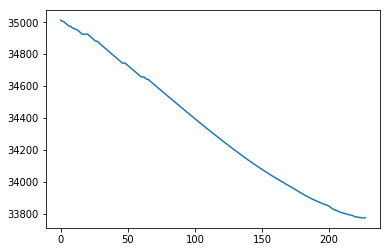

In [53]:
sns.lineplot(y=bic_list, x=range(len(bic_list)))

In [54]:
len(data_with_dummies.columns)

281

In [55]:
#cur_data.columns.tolist()


In [56]:
#sorted(cur_results_dict.items(), key=lambda kv: kv[1], reverse=True)
step_back_data = cur_data.copy()

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(cur_data)
temp = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

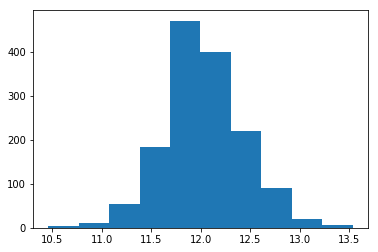

In [58]:
plt.hist(np.log(response))
#plt.hist(response)

In [59]:
step_back_model = LinearRegression(n_jobs=6)
step_back_model.fit(step_back_data, np.log(response))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=6, normalize=False)

In [60]:
temp_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     78.05
Date:                Thu, 15 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:51:34   Log-Likelihood:                 1394.7
No. Observations:                1460   AIC:                            -2255.
Df Residuals:                    1193   BIC:                            -844.0
Df Model:                         266                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage           -5.516e-07      0.000     -0.005      0.996      -0.000       0.000
LotArea                2.708e-06   4.93e-07      5.496      0.000    1.74e-06    3.67e-06
YearBuilt                 0.0018      0.000      4.566      0.000       0.001       0.003
YearRemodAdd              0.0008      0.000      3.145      0.002       0.000       0.001
MasVnrArea             2.362e-05   2.66e-05      0.890      0.374   -2.85e-05    7.57e-05
TotalBsmtSF            9.977e-05   1.78e-05      5.590      0.000    6.48e-05       0.000
LowQualFinSF          -7.166e-05   8.51e-05     -0.842      0.400      -0.000    9.53e-05
GrLivArea                 0.0002    1.8e-05     13.432      0.000       0.000       0.000
BsmtFullBath              0.0418      0.008      5.178      0.000       0.026       0.058
BsmtHalfBath              0.0206      0.014      1.519      0.129      -0.006       0.047
FullBath                  0.0293      0.010      2.868      0.004       0.009       0.049
HalfBath                  0.0287      0.010      3.002      0.003       0.010       0.047
BedroomAbvGr              0.0004      0.006      0.067      0.947      -0.011       0.012
KitchenAbvGr             -0.0678      0.028     -2.431      0.015      -0.123      -0.013
Fireplaces                0.0170      0.012      1.451      0.147      -0.006       0.040
GarageYrBlt            2.108e-05      0.000      0.078      0.938      -0.001       0.001
GarageCars                0.0449      0.008      5.833      0.000       0.030       0.060
WoodDeckSF             9.237e-05   2.69e-05      3.435      0.001    3.96e-05       0.000
OpenPorchSF             4.01e-05   5.33e-05      0.752      0.452   -6.45e-05       0.000
EnclosedPorch             0.0001   5.75e-05      1.899      0.058   -3.61e-06       0.000
3SsnPorch                 0.0002      0.000      1.675      0.094   -2.93e-05       0.000
ScreenPorch               0.0003   5.71e-05      5.039      0.000       0.000       0.000
PoolArea                  0.0016      0.001      1.541      0.124      -0.000       0.004
MiscVal               -2.763e-05   2.89e-05     -0.955      0.340   -8.44e-05    2.91e-05
YrSold                   -0.0028      0.002     -1.170      0.242      -0.007       0.002
MSZoning_C (all)         -0.4651      0.049     -9.451      0.000      -0.562      -0.369
MSZoning_FV               0.0384      0.031      1.247      0.212      -0.022       0.099
MSZoning_RH              -0.0097      0.031     -0.310      0.757      -0.071       0.051
MSZoning_RM              -0.0555      0.018     -3.166      0.002      -0.090      -0.021
Street_Grvl              -0.0839      0.059     -1.418      0.156      -0.200       0.032
Alley_Grvl                0.0067      0.020      0.343      0.732      -0.032       0.045
Alley_Pave             

In [61]:
temp_model = sm.OLS(np.log(response), data_with_dummies)
temp_results = temp_model.fit()
print(round(temp_results.bic, 3))
temp_results_dict = temp_results.pvalues.to_dict()
col_to_drop_log = sorted(temp_results_dict.items(), key=lambda kv: kv[1], reverse=True)[0][0]
cur_log_data = data_with_dummies.drop(col_to_drop_log, axis=1)
bic_log_list = [temp_results.bic]
prev_log_bic = round(temp_results.bic,3)

-844.033


In [62]:
#for i in range(len(data_with_dummies.columns)):
for i in range(250):
    cur_log_model = sm.OLS(np.log(response), cur_log_data)
    cur_log_results = cur_log_model.fit()
    #bic_list.append(cur_log_results.bic)
    if(round(cur_log_results.bic, 3) > prev_log_bic):
        print('Found optimal feature set: Step {}'.format(i))
        break
    #print(round(cur_log_results.bic, 3))
    prev_log_bic = round(cur_log_results.bic,3)
    cur_log_results.pvalues
    cur_log_results_dict = cur_log_results.pvalues.to_dict()
    col_to_drop = sorted(cur_log_results_dict.items(), key=lambda kv: kv[1], reverse=True)[0][0]
    cur_log_data = cur_log_data.drop(col_to_drop, axis=1)

Found optimal feature set: Step 213


In [63]:
print(cur_log_data.shape)
step_back_columns = cur_log_data.columns.tolist()

(1460, 67)


In [64]:
f_score, p_value = fs.f_regression(data[cont_list], np.log(response))
#print(["Feature {} is significant: pvalue is {}".format(cont_list[i],x) for i,x in enumerate(p_value) if x < 0.05 ])
sig_cont_list = [cont_list[i] for i,x in enumerate(p_value) if x < 0.05]
#print('\n'.join(sig_cont_list))
print(len(sig_cont_list))
sig_cont_list

21


['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea']

In [65]:
X_train, X_test, Y_train, Y_test = ms.train_test_split(data_with_dummies, response, test_size=0.2, random_state=0)

In [66]:
X_test.shape

(292, 281)

In [67]:
X_train[step_back_columns].head()

,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,Fireplaces,...,GarageCond_TA,GarageType_2Types,BldgType_1Fam,BldgType_2fmCon,BldgType_Twnhs,BldgType_TwnhsE,Exterior1st_BrkFace,SaleType_COD,SaleType_WD,SaleCondition_Normal
618,11694,2007,2007,1822,1828,0,2,0,1,1,...,1,0,1,0,0,0,0,0,0,0
870,6600,1962,1962,894,894,0,1,0,1,0,...,1,0,1,0,0,0,0,0,1,1
92,13360,1921,2006,876,964,1,1,0,1,0,...,1,0,1,0,0,0,0,0,1,1
817,13265,2002,2002,1568,1689,1,2,0,1,2,...,1,0,1,0,0,0,0,0,1,1
302,13704,2001,2002,1541,1541,0,2,0,1,1,...,1,0,1,0,0,0,0,0,1,1


In [358]:
back_linear_model = LinearRegression(n_jobs=6)
back_linear_model.fit(X_train[step_back_columns], np.log(Y_train))
get_rmse(np.log(Y_test), back_linear_model.predict(X_test[step_back_columns]))
#round(np.log(Y_test)- back_linear_model.predict(X_test[step_back_columns]), 5).head()
back_linear_model.score(X_test[step_back_columns], np.log(Y_test))
linear_betas = enumerate(back_linear_model.coef_)
[step_back_columns[i] for i,x in sorted(linear_betas, key=lambda x: abs(x[1]), reverse=True)][:10]

['Condition2_PosN',
 'OverallQual_1',
 'MSZoning_C (all)',
 'Functional_Maj2',
 'OverallQual_10',
 'OverallQual_9',
 'OverallQual_2',
 'OverallCond_3',
 'Heating_Grav',
 'GarageQual_Ex']

In [69]:
print(back_linear_model.score(X_train[step_back_columns], np.log(Y_train)))
#print(back_linear_model.score(X_test[step_back_columns], np.log(Y_test)))
scores = ms.cross_val_score(estimator=back_linear_model, X=X_train[step_back_columns], y=np.log(Y_train), cv=10)
scores.mean()
back_linear_model.coef_

0.9389045213441548


array([ 1.71953242e-06,  1.91631660e-03,  8.31320381e-04,  1.40401551e-04,
        2.43766900e-04,  4.68770209e-02,  2.96294468e-02,  2.61786628e-02,
       -6.26993463e-02,  2.65869874e-02,  5.07563173e-02,  8.21770561e-05,
        1.92692327e-04,  3.45609466e-04, -4.24553823e-01, -5.75818164e-02,
        3.87519644e-02,  5.41774782e-02,  1.52570490e-01, -3.58664721e-02,
       -1.09806506e-01,  3.89588470e-02,  7.13997321e-02,  6.44325132e-02,
        8.76985226e-02, -8.35969618e-02, -3.79067274e-02, -1.38652280e-01,
       -1.63800803e+00, -1.38777878e-16, -1.81908838e-01, -5.83663616e-02,
        1.62796543e-02, -4.54115488e-01, -2.01508891e-01, -1.10894465e-01,
       -2.73552258e-02,  3.19925128e-02,  8.49493112e-02,  1.48559046e-01,
        2.34750044e-01,  2.46919746e-01, -1.90638774e-01, -5.39305954e-02,
        3.99104903e-02,  9.22038501e-02,  7.74646654e-02,  1.49828716e-01,
       -1.96217017e-02,  6.85926202e-02, -7.77156117e-16, -2.86000056e-01,
       -1.21487366e-01, -

In [70]:
back_ridge_model = Ridge(normalize=True)

In [71]:
back_ridge_model.fit(X_train[step_back_columns], np.log(Y_train))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [72]:
back_ridge_model.score(X_train[step_back_columns], np.log(Y_train))
back_ridge_model.coef_
np.arange(0,20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [73]:
scores = ms.cross_val_score(estimator=back_ridge_model, X=X_train[step_back_columns], y=np.log(Y_train), cv=10)
scores.mean()


0.8846881169954139

In [74]:
#ridge_grid.cv_r

In [75]:
back_ridge_model = Ridge(normalize=True,random_state=0)
coef_list = []
for i in np.linspace(0.001, 5, 1000):
    back_ridge_model.set_params(alpha=i)
    back_ridge_model.fit(X_train[step_back_columns], np.log(Y_train))
    coef_list.append(back_ridge_model.coef_)

In [76]:
len(coef_list)
temp = pd.DataFrame(coef_list, index=np.linspace(0.001,1,1000), columns=step_back_columns)
temp.head()
#temp.YearBuilt.head()

,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,Fireplaces,...,GarageCond_TA,GarageType_2Types,BldgType_1Fam,BldgType_2fmCon,BldgType_Twnhs,BldgType_TwnhsE,Exterior1st_BrkFace,SaleType_COD,SaleType_WD,SaleCondition_Normal
0.001,0.000002,0.001903,0.000839,0.000141,0.000243,0.046836,0.030147,0.026501,-0.062620,0.026730,...,0.057661,-0.138691,0.024840,0.013820,-0.088253,-0.016804,0.056451,-0.119519,-0.100186,0.048310
0.002,0.000002,0.001838,0.000873,0.000141,0.000238,0.046630,0.032595,0.028011,-0.062206,0.027422,...,0.057892,-0.139133,0.025196,0.013164,-0.088289,-0.017207,0.056401,-0.117682,-0.098887,0.047489
0.003,0.000002,0.001779,0.000904,0.000141,0.000234,0.046427,0.034827,0.029366,-0.061771,0.028075,...,0.058098,-0.139466,0.025535,0.012539,-0.088298,-0.017573,0.056343,-0.115919,-0.097617,0.046686
0.004,0.000002,0.001726,0.000933,0.000142,0.000230,0.046227,0.036869,0.030587,-0.061320,0.028693,...,0.058282,-0.139702,0.025856,0.011943,-0.088283,-0.017908,0.056277,-0.114226,-0.096378,0.045901
0.005,0.000002,0.001677,0.000959,0.000142,0.000226,0.046030,0.038744,0.031690,-0.060859,0.029280,...,0.058448,-0.139854,0.026161,0.011373,-0.088247,-0.018214,0.056204,-0.112598,-0.095170,0.045135


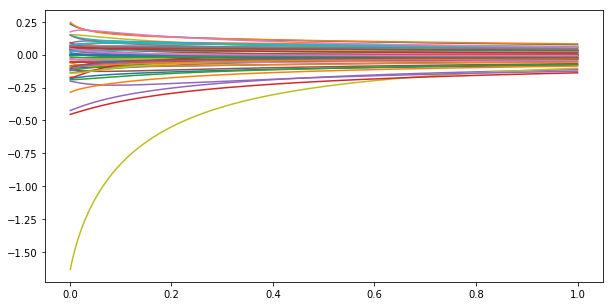

In [77]:
plt.figure(figsize=[10,5])
for name in temp.columns:
    plt.plot(temp.index, temp[name])
#plt.plot(temp.index, temp.LotArea)

63


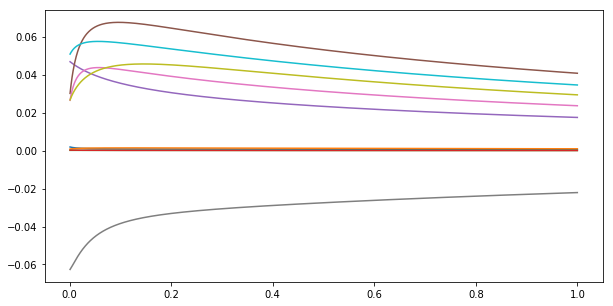

In [78]:
ridge_columns = temp.loc[:,abs(temp.iloc[0,:]) > 0.0001].columns.tolist()
plt.figure(figsize=[10,5])
print(len(ridge_columns))
ridge_columns
for name in ridge_columns[0:10]:
    plt.plot(temp.index, temp[name], label='Inline label')

In [79]:
temp.index

Float64Index([               0.001,                0.002,                0.003,
                             0.004,                0.005,                0.006,
                             0.007,                0.008, 0.009000000000000001,
              0.010000000000000002,
              ...
                             0.991,                0.992,                0.993,
                             0.994,                0.995,                0.996,
                             0.997,                0.998,                0.999,
                               1.0],
             dtype='float64', length=1000)

In [81]:
#Y_train - np.ones_like(Y_train)*Y_train.mean()
len(ridge_columns)
#Y_train.mean()
#back_ridge_model.predict()

63

In [82]:
ridge_columns
back_ridge_model_reduced = Ridge(normalize=True,random_state=0)
root_mse_list = []
for i in np.linspace(0.001, 5, 1000):
    back_ridge_model_reduced.set_params(alpha=i)
    back_ridge_model_reduced.fit(X_train[ridge_columns], np.log(Y_train))
    back_ridge_model_reduced.coef_
    train_error = np.log(Y_train) - back_ridge_model_reduced.predict(X_train[ridge_columns])
    train_mse = (np.mean(train_error**2))**.5
    test_error = np.log(Y_test) - back_ridge_model_reduced.predict(X_test[ridge_columns])
    test_mse = (np.mean(test_error**2))**.5
    root_mse_list.append([train_mse, test_mse])
    
    
#    coef_list.append(back_ridge_model.coef_)


0.1629185230019827


,Train MSE,Test MSE
1.081865,0.134571,0.162919


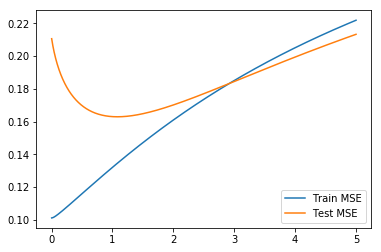

In [83]:
temp = pd.DataFrame(root_mse_list, index=np.linspace(0.001, 5, 1000), columns=['Train MSE', 'Test MSE'])
temp.plot.line()
#root_mse_list[1]
print(temp['Test MSE'].min())
temp.loc[temp['Test MSE'] == temp['Test MSE'].min()]

In [348]:
back_ridge_model_reduced.set_params(alpha=1.082)
back_ridge_model_reduced.fit(X_test[ridge_columns], np.log(Y_test))
back_ridge_model_reduced.score(X_test[ridge_columns], np.log(Y_test))
#len(ridge_columns)

0.8478641996288198

In [85]:
back_lasso_model = Lasso(normalize=True, random_state=0, alpha=1e-6)
back_lasso_model.fit(X_train[step_back_columns], np.log(Y_train))

#ridge_columns = temp.loc[:,abs(temp.iloc[0,:]) > 0.0001].columns.tolist()
lasso_columns = [step_back_columns[i] for i,x in enumerate(abs(back_lasso_model.coef_) >= 0.001 ) if x]
len(lasso_columns)
#step_back_columns[back_lasso_model.coef_ == 0]

57

In [345]:
back_lasso_model_reduced = Lasso(normalize=True,random_state=0)
root_mse_list = []
beta_list = []
cur_range = np.linspace(1e-15, 1e-3, 1000)
for i in cur_range:
    back_lasso_model_reduced.set_params(alpha=i)
    back_lasso_model_reduced.fit(X_train[lasso_columns], np.log(Y_train))
    back_lasso_model_reduced.coef_
    train_error = np.log(Y_train) - back_lasso_model_reduced.predict(X_train[lasso_columns])
    train_mse = (np.mean(train_error**2))**.5
    test_error = np.log(Y_test) - back_lasso_model_reduced.predict(X_test[lasso_columns])
    test_mse = (np.mean(test_error**2))**.5
    root_mse_list.append([train_mse, test_mse])
    beta_list.append(back_lasso_model_reduced.coef_)
    back_lasso_model_reduced.set_params(warm_start=True)
    

0.15990472209736054


,Train RMSE,Test RMSE
0.000099,0.134872,0.159905


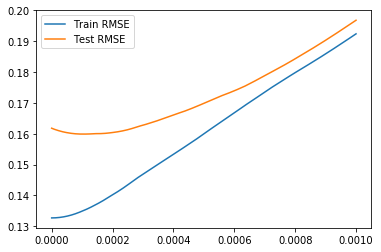

In [346]:
temp = pd.DataFrame(root_mse_list, index=cur_range, columns=['Train RMSE', 'Test RMSE'])
temp.plot.line()
#root_mse_list[1]
print(temp['Test RMSE'].min())
temp.loc[temp['Test RMSE'] == temp['Test RMSE'].min()]

,YearBuilt,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,Fireplaces,GarageCars,MSZoning_C (all),MSZoning_RM,LotConfig_CulDSac,...,GarageCond_TA,GarageType_2Types,BldgType_1Fam,BldgType_2fmCon,BldgType_Twnhs,BldgType_TwnhsE,Exterior1st_BrkFace,SaleType_COD,SaleType_WD,SaleCondition_Normal
0.000996,1.002619,0.424263,2.852476,0.438993,-0.0,2.187926,3.801321,-0.638271,-0.550288,0.0,...,0.0,-0.0,0.512201,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
0.000997,1.003196,0.423329,2.852493,0.438458,-0.0,2.188318,3.802306,-0.637522,-0.549829,0.0,...,0.0,-0.0,0.511304,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
0.000998,1.003774,0.422395,2.852510,0.437923,-0.0,2.188710,3.803290,-0.636773,-0.549371,0.0,...,0.0,-0.0,0.510407,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
0.000999,1.004352,0.421461,2.852527,0.437388,-0.0,2.189102,3.804275,-0.636025,-0.548912,0.0,...,0.0,-0.0,0.509511,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
0.001000,0.000967,0.023980,0.152738,0.025756,-0.0,0.099991,0.152542,-0.212830,-0.045108,0.0,...,0.0,-0.0,0.040656,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0


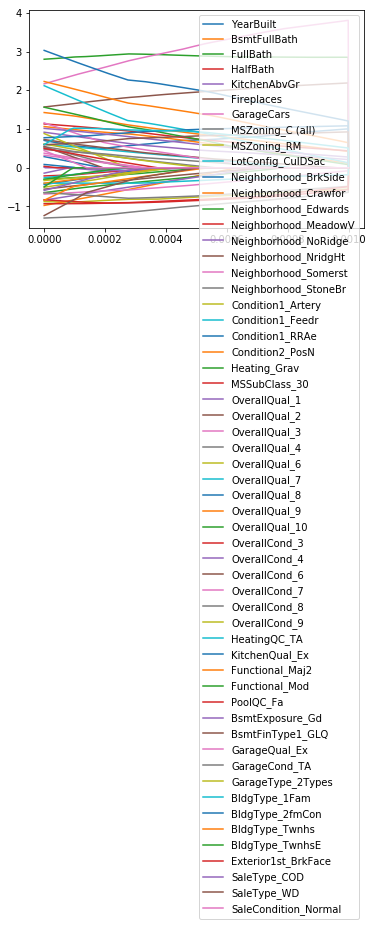

In [88]:
coef_df = pd.DataFrame(beta_list, columns=lasso_columns, index=cur_range)
coef_df.plot.line()
coef_df.tail()
#[step_back_columns[i] for i,x in enumerate(back_lasso_model.coef_!= 0) if x]

In [89]:
temp_lasso = Lasso(normalize=True, random_state=0, alpha=.000099)
temp_lasso.fit(X_train[lasso_columns], np.log(Y_train))

Lasso(alpha=9.9e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
temp_lasso.coef_
len([step_back_columns[i] for i,x in enumerate(abs(temp_lasso.coef_) >= 0.001 ) if x])
temp_lasso.score(X_test[lasso_columns], np.log(Y_test))

0.8311124969235507

In [91]:
ridge_cv = RidgeCV(alphas=np.linspace(0.001, 5, 1000), normalize=True, cv=5)
ridge_cv.fit(X_train[step_back_columns], np.log(Y_train))
#ridge_cv.coef_

RidgeCV(alphas=array([1.000e-03, 6.004e-03, ..., 4.995e+00, 5.000e+00]), cv=5,
    fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [92]:
print(ridge_cv.score(X_train[step_back_columns], np.log(Y_train)))
print(ridge_cv.alpha_)
print(ridge_cv.score(X_test[step_back_columns], np.log(Y_test)))
#ridge_cv.coef_

0.9378123627476214
0.05604404404404405
0.7377844240989024


In [93]:
lasso_cv = LassoCV(normalize=True,alphas=cur_range, cv=5)
lasso_cv.fit(X_train[step_back_columns], np.log(Y_train))

C:\Users\seanj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\seanj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\seanj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\seanj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

LassoCV(alphas=array([1.00000e-15, 1.00100e-06, ..., 9.98999e-04, 1.00000e-03]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [94]:
lasso_cv.alpha_
lasso_cv.score(X_test[step_back_columns], np.log(Y_test))

0.709100346556524

In [95]:
elastic_model = ElasticNet(normalize=True, random_state=0, l1_ratio=0.5, alpha=0.001)
elastic_model.fit(X_train[step_back_columns], np.log(Y_train))

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
elastic_model.score(X_train[step_back_columns], np.log(Y_train))
#len([step_back_columns[i] for i,x in enumerate(abs(elastic_model.coef_) >= 0.001 ) if x])

0.8650562325958292

In [97]:
ratio = np.linspace(0.1, 0.9, 9)
alpha_range = np.linspace(1e-6, 1e-3, 100)
score_list = []
elastic_model = ElasticNet(normalize=True, random_state=0)
for i in ratio:
    print('Running with ratio set to {}'.format(i))
    for j in alpha_range:
        elastic_model.set_params(alpha=j, l1_ratio=i)
        elastic_model.fit(X_train[step_back_columns], np.log(Y_train))
        #train_score = elastic_model.score(X_train[step_back_columns], np.log(Y_train))
        #test_score = elastic_model.score(X_test[step_back_columns], np.log(Y_test))
        train_error = np.log(Y_train) - elastic_model.predict(X_train[step_back_columns])
        train_mse = (np.mean(train_error**2))**.5
        test_error = np.log(Y_test) - elastic_model.predict(X_test[step_back_columns])
        test_mse = (np.mean(test_error**2))**.5
        score_list.append([i, j, train_mse, test_mse])
        
        

Running with ratio set to 0.1
Running with ratio set to 0.2
Running with ratio set to 0.30000000000000004
Running with ratio set to 0.4
Running with ratio set to 0.5
Running with ratio set to 0.6
Running with ratio set to 0.7000000000000001
Running with ratio set to 0.8
Running with ratio set to 0.9


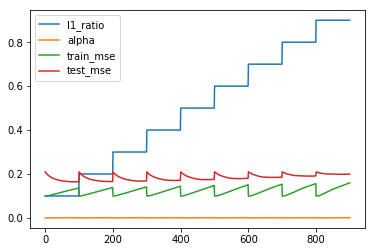

In [335]:
temp_df = pd.DataFrame(score_list, columns=['l1_ratio', 'alpha', 'train_mse', 'test_mse'])
temp_df.head(10)

temp_df.test_mse.min()
temp_df.loc[temp_df.test_mse == temp_df.test_mse.min()]
temp_df.plot()

In [341]:
elastic_model.set_params(alpha=0.000939, l1_ratio=0.1)
elastic_model.fit(X_train[step_back_columns], np.log(Y_train))
print(elastic_model.score(X_test[step_back_columns], np.log(Y_test)))
get_rmse(np.log(Y_test), elastic_model.predict(X_test[step_back_columns]))
#elastic_model.coef_

0.822128352864223


0.16410305903796077

In [100]:
import xgboost as xgb

In [194]:
xboostr = xgb.XGBRegressor(n_jobs=4, random_state=0)


In [195]:
xboostr.fit(X_train, np.log(Y_train))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [166]:
print(xboostr.score(X_train, np.log(Y_train)))
xboostr.score(X_test, np.log(Y_test))

0.9510477454142732


0.8787542723129076

In [196]:
learning_rates = np.linspace(0.01,.1,3)
num_estimators = range(100, 1001, 300)
max_depth = range(2,11, 3)
gamma= np.linspace(0.01, .1, 5)

In [197]:
",".join([str(x) for x in num_estimators])
learning_rates
#list(max_depth)[]

array([0.01 , 0.055, 0.1  ])

In [198]:
grid = ms.GridSearchCV(estimator=xboostr, verbose=3,cv=5, n_jobs=3, param_grid={'learning_rate':learning_rates,
                                                            'n_estimators':num_estimators,
                                                            'max_depth': max_depth,
                                                            'gamma':gamma})

In [199]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   15.4s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  3.0min
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:  6.8min
[Parallel(n_jobs=3)]: Done 506 tasks      | elapsed: 12.9min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 20.8min
[Parallel(n_jobs=3)]: Done 900 out of 900 | elapsed: 23.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'learning_rate': array([0.01 , 0.055, 0.1  ]), 'n_estimators': range(100, 1001, 300), 'max_depth': range(2, 11, 3), 'gamma': array([0.01  , 0.0325, 0.055 , 0.0775, 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [200]:
grid.best_params_

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 700}

In [201]:
grid.best_score_

0.8623382243960361

In [192]:
grid.best_estimator_.score(X_test, np.log(Y_test))

-249336950480.61835

In [193]:
xboost_best = xgb.XGBRegressor(n_jobs=4, random_state=0, learning_rate=0.1, max_depth=5, n_estimators=700, gamma=0.01)
xboost_best.fit(X_train, np.log(Y_train))
print(xboost_best.score(X_train, np.log(Y_train)))
xboost_best.score(X_test, np.log(Y_test))

0.985039014885118


0.8873685263240565

In [202]:
learning_rates = np.linspace(0.01,.5,10)
gamma= np.linspace(0.01, .1, 10)
num_estimators = range(100, 1001, 100)
max_depth = range(2,11, 1)
step_boost = xgb.XGBRegressor(n_jobs=4, random_state=0)
step_grid = ms.GridSearchCV(estimator=step_boost, n_jobs=3, verbose=3,cv=5, param_grid={'learning_rate':learning_rates,
                                                            'n_estimators':num_estimators,
                                                            'max_depth': max_depth,
                                                            'gamma': gamma})
step_grid.fit(X_train[step_back_columns], np.log(Y_train))

Fitting 5 folds for each of 9000 candidates, totalling 45000 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    6.4s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:   40.4s
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:  2.4min
[Parallel(n_jobs=3)]: Done 506 tasks      | elapsed:  5.4min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  8.8min
[Parallel(n_jobs=3)]: Done 1146 tasks      | elapsed: 13.5min
[Parallel(n_jobs=3)]: Done 1562 tasks      | elapsed: 19.1min
[Parallel(n_jobs=3)]: Done 2042 tasks      | elapsed: 25.8min
[Parallel(n_jobs=3)]: Done 2586 tasks      | elapsed: 33.7min
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed: 43.5min
[Parallel(n_jobs=3)]: Done 3866 tasks      | elapsed: 51.9min
[Parallel(n_jobs=3)]: Done 4602 tasks      | elapsed: 63.2min
[Parallel(n_jobs=3)]: Done 5402 tasks      | elapsed: 73.7min
[Parallel(n_jobs=3)]: Done 6266 tasks      | elapsed: 85.2min
[Parallel(n_jobs=3)]: Done 7194 tasks      | elapsed: 99.1min


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'learning_rate': array([0.01   , 0.06444, 0.11889, 0.17333, 0.22778, 0.28222, 0.33667,
       0.39111, 0.44556, 0.5    ]), 'n_estimators': range(100, 1001, 100), 'max_depth': range(2, 11), 'gamma': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [203]:
step_grid.best_params_

{'gamma': 0.01,
 'learning_rate': 0.06444444444444444,
 'max_depth': 2,
 'n_estimators': 600}

In [204]:
step_grid.best_score_

0.9002290852987456

In [205]:
step_boost_best = xgb.XGBRegressor(n_jobs=4, random_state=0, gamma=0.01, learning_rate=0.0644, max_depth=2, n_estimators=600)
step_boost_best.fit(X_train[step_back_columns], np.log(Y_train))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.01, learning_rate=0.0644,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=600, n_jobs=4, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [336]:
print(step_boost_best.score(X_train[step_back_columns], np.log(Y_train)))
print(step_boost_best.score(X_test[step_back_columns], np.log(Y_test)))
get_rmse(np.log(Y_test), step_boost_best.predict(X_test[step_back_columns]))

0.9562821065783332
0.8888470086269209


0.1297249360066052

In [209]:
svr = SVR()
svr.fit(X_train[step_back_columns], np.log(Y_train))

C:\Users\seanj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [213]:
print(svr.score(X_train[step_back_columns], np.log(Y_train)))
svr.score(X_test[step_back_crolumns], np.log(Y_test))

0.9378250621164088


0.018600301444658296

In [258]:
pca = PCA()
#[x for i,x, in x_scale.isna().sum() if x != 0]
[step_back_columns[i] for i,x in enumerate(x_scale.isna().sum()) if x !=0]
temp_step_back_columns = step_back_columns.copy()
columns_to_remove = ['RoofMatl_ClyTile', 'Functional_Sev', 'Heating_Grav', 'OverallQual_1', 'OverallQual_2', 'GarageType_2Types']
temp_step_back_columns = [x for x in step_back_columns if x not in columns_to_remove]
x_scale = X_train[temp_step_back_columns]/X_train[temp_step_back_columns].std()
#X_test.RoofMatl_ClyTile.sum()
pca.fit(x_scale)
len(x_scale.columns)

61

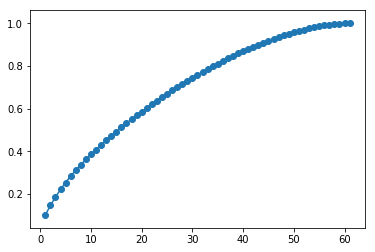

In [264]:
pca.explained_variance_ratio_
len(pca.explained_variance_ratio_)

plt.scatter(range(1, 62), np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(1, 62), np.cumsum(pca.explained_variance_ratio_))
#x_transform = pca.transform()

In [285]:
#pca.set_params(n_components=50)
pca.fit(x_scale)
x_train_scale = pca.transform(x_scale)
linear_pca = LinearRegression(n_jobs=6)
linear_pca.fit(x_train_scale, np.log(Y_train))
linear_pca.score(x_train_scale, np.log(Y_train))

0.923701110118493

In [337]:
x_test_scale = X_test[temp_step_back_columns]/X_test[temp_step_back_columns].std()

#[temp_step_back_columns[i] for i,x in enumerate(x_test_scale.isna().sum()) if x != 0]
x_test_scale = pca.transform(x_test_scale)
linear_pca.score(x_test_scale, np.log(Y_test))
get_rmse(np.log(Y_test), linear_pca.predict(x_test_scale))

0.1708598868746208

In [339]:
xgb_pca = xgb.XGBRegressor(n_jobs=4, random_state=0)
xgb_pca.fit(x_train_scale, np.log(Y_train))
xgb_pca.score(x_train_scale, np.log(Y_train))
xgb_pca.score(x_test_scale, np.log(Y_test))
#get_rmse(np.log(Y_test), xgb_pca.predict(x_test_scale))

0.8669911814919716

In [288]:
learning_rates = np.linspace(0.01,.1,3)
num_estimators = range(100, 1001, 300)
max_depth = range(2,11, 3)
gamma= np.linspace(0.01, .1, 5)

In [276]:
grid = ms.GridSearchCV(estimator=xgb_pca, verbose=3,cv=5, n_jobs=3, param_grid={'learning_rate':learning_rates,
                                                            'n_estimators':num_estimators,
                                                            'max_depth': max_depth,
                                                            'gamma':gamma})

In [278]:
grid.fit(x_train_scale, np.log(Y_train))

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   11.6s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  2.0min
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:  4.6min
[Parallel(n_jobs=3)]: Done 506 tasks      | elapsed:  8.8min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 13.6min
[Parallel(n_jobs=3)]: Done 900 out of 900 | elapsed: 15.9min finished
C:\Users\seanj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'learning_rate': array([0.01 , 0.055, 0.1  ]), 'n_estimators': range(100, 1001, 300), 'max_depth': range(2, 11, 3), 'gamma': array([0.01  , 0.0325, 0.055 , 0.0775, 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [281]:
grid.best_params_
#grid.best_score_

{'gamma': 0.01,
 'learning_rate': 0.05500000000000001,
 'max_depth': 2,
 'n_estimators': 700}

In [289]:
xgb_pca.set_params(gamma=0.01, learning_rate=0.055, max_depth=2, n_estimators=700)
xgb_pca.fit(x_train_scale, np.log(Y_train))
xgb_pca.score(x_train_scale, np.log(Y_train))

0.9752469959437791

In [290]:
xgb_pca.score(x_test_scale, np.log(Y_test))

0.8666445622436644

In [297]:
rf_step_back = ensemble.RandomForestRegressor(random_state=0, n_jobs=4)
rf_step_back.fit(X_train[step_back_columns], np.log(Y_train))
rf_step_back.score(X_train[step_back_columns], np.log(Y_train))
rf_step_back.score(X_test[step_back_columns], np.log(Y_test))
rf_step_back

C:\Users\seanj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [316]:
grid_rf = ms.GridSearchCV(n_jobs=3, cv=5, verbose=3, estimator=rf_step_back, 
                          param_grid={'max_depth':range(2,6), 'n_estimators':range(100,1001,300), 
                                      'min_samples_leaf':range(1,3), 'min_samples_split': range(2,5)})
grid_rf.fit(X_train[step_back_columns], np.log(Y_train))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   13.0s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:   52.1s
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done 480 out of 480 | elapsed:  3.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'max_depth': range(2, 6), 'n_estimators': range(100, 1001, 300), 'min_samples_leaf': range(1, 3), 'min_samples_split': range(2, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [317]:
print(grid_rf.best_score_)

0.8216619985942858


In [318]:
print(grid_rf.best_params_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [320]:
temp_rf = ensemble.RandomForestRegressor(max_depth=5,min_samples_leaf=1, min_samples_split=2, 
                                         n_estimators=100, random_state=0, n_jobs=4)
temp_rf.fit(X_train[step_back_columns], np.log(Y_train))
print(temp_rf.score(X_train[step_back_columns], np.log(Y_train)))
print(temp_rf.score(X_test[step_back_columns], np.log(Y_test)))

0.8833928487065105
0.8428877240708723


In [322]:
def get_rmse(y_real, y_predict):
    error = round(y_real - y_predict, 5)
    return np.mean(error**2)**0.5
    
round(np.log(Y_train) - temp_rf.predict(X_train[step_back_columns]), 5).head()
get_rmse(np.log(Y_train), temp_rf.predict(X_train[step_back_columns]))

0.13721421203542816

In [349]:
train_error = np.log(Y_train) - back_ridge_model_reduced.predict(X_train[ridge_columns])
train_mse = (np.mean(train_error**2))**.5
test_error = np.log(Y_test) - back_ridge_model_reduced.predict(X_test[ridge_columns])
test_mse = (np.mean(test_error**2))**.5
root_mse_list.append([train_mse, test_mse])

In [350]:
len(step_back_columns)

67

In [351]:
[x for x in step_back_columns if x in cont_list]

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea']

In [352]:
[x for x in step_back_columns if x in cat_list or x in ord_list]

[]